<a href="https://colab.research.google.com/github/Danielmark001/fraud-detection-ml/blob/main/googlecolab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Defining the problem:**

<h3> Introduction:


- Financial Fraud Detection is the process of monitoring transactions and customer behavior to identify and stop fraudulent activity. According to Juniper Research's 2022 study about online payment fraud, globally payment fraud are noted to exceed $343 billion between 2023 and 2027.
- Traditionally, firms have used fraud detection and prevention to curb company financial losses and maintain positive customer relations.

<h3> Common Types of Fraud:


There are different type of fraut and constanlty emerging. Some fraud typologies persist because they exploit weaknesses in a company's processes and systems. Here are some common type of frauds.

1. **Payment Fraud:** Happens when a criminal acquires another individual's payement iformation and makes unauthorized transactions.
2. **Return Fraud:** takes advantage of a retailer's return policy to receive refunts that aren't legitimate. Fraudulent returns may consist of stolen goods, conterfit products, old and worn-out goods, or items bought from a different retailer.
3. **ACH Fraud:** Automated Clearing House is a means of transferring money between bank accounts, usually those of businesses and institutions. ACH is carried out using a bank account number and bank routing number.
4. **Chargeback fraud:** contains an individual requesting chargebacks for transactions that were fulfilled by the company they purchased from.
5. **Account takeover fraud (ATO):** happens when a criminal acquires the authenication of an account, such as bank account, online payment service, mobile account, or e-commerce site.

<h3> Methods to detect fraud:


To protect businesses and counsumers from evolving fraud risks, employing the most effective fraud detection techniques is very important. There are following techniques that can be used to detect frauds.

1. **Machine Learning and AI:** Mahcine learning algorithm and AI is enhancing fraud detection capabilities. These techniques analyze large amount of data in real-time, identify patterns and anomalies that might show fraudulent activities.
2. **Behavioral Analytics:** By analysing users behaviors, businesses can detect deviations from normal patterns.
3. **Anomaly Detection:** Anomaly Detection helps in creating a baseline of normal behavior and flagging any data points that deviate significantly from it.
4. **Identity clustering:** Making a group of user identities based on common attributes and behaviors helps in identify patterns of fraudulent behavior.
5. **Data analytics:** Advanced data analytics tools can shift thgough a large datasets and identify potential fraud indicators.

<h3> Main Challenges of Fraud Detection


1. **Management:** Relying soley on rule-based transaction monitoring and fraud detection can be a challenge as sca, techniques change.
2. **Remote transactions:** While this is convenient and cost-effective, it also opens the door for fraudsters to impersonate genuine customers or intercept their details.
3. **Speed of transactions:** Now-a-days transaction ecosystem is built for speed and convenience. This high-speed, low-friction environement can make it easy for fraudsters to complete their crimes and disappear before they can be detected.
4. **False positives:** A fraud detection system that is over-zealous can lead to higher false positives. This is inconvenient for customers, who may become less loyal as a result, and expensive for businesses, who must expend time and resources following up the alert.
5. **Range of transaction types:** Large number of tools and services are used to make transactions such as payment apps and cryptocurrency, loans, credit cards and savings accounts. # About the dataset
- The dataset is a synthetic representation of mobile money transactions, usually to carried out real-world financial activities while integrating fraudulent behaviors for research purposes.
- The dataset encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER over a simulated period of 30 days.

<h3> Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

## **Dataset:**

There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.

We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.

Axi, E. (2018). Synthetic Financial Datasets For Fraud Detection [Data set]. Kaggle. https://www.kaggle.com/datasets/ealaxi/paysim1/data

In [ ]:
nRowsRead = 100000
df = pd.read_csv('PS_20174392719_1491204439457_log.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'PS_20174392719_1491204439457_log.csv'
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


<h2> Dataset Overview


In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 100000 rows and 11 columns


In [ ]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [ ]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
9     37628
10    27274
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: count, dtype: int64
Unique values for column type
type
PAYMENT     39512
CASH_OUT    30718
CASH_IN     20185
TRANSFER     8597
DEBIT         988
Name: count, dtype: int64
Unique values for column amount
amount
2475.13      3
6285.19      3
17320.91     3
89631.24     3
25975.86     3
            ..
443197.75    1
3575.87      1
2744.47      1
560356.16    1
20096.56     1
Name: count, Length: 99470, dtype: int64
Unique values for column nameOrig
nameOrig
C1231006815    1
C1407775146    1
C1802124274    1
C1910868687    1
C579725406     1
              ..
C668560116     1
C986934168     1
C1567015632    1
C1280981431    1
C1868032458    1
Name: count, Length: 100000, dtype: int64
Unique values for column oldbalanceOrg
oldbalanceOrg
0.00         31254
164.00          22
144.00          20
168.00          19
101.00          19
   

<h2> Exploratory Analysis

**Distribution graphs (histogram/bar graph) of sampled columns:**

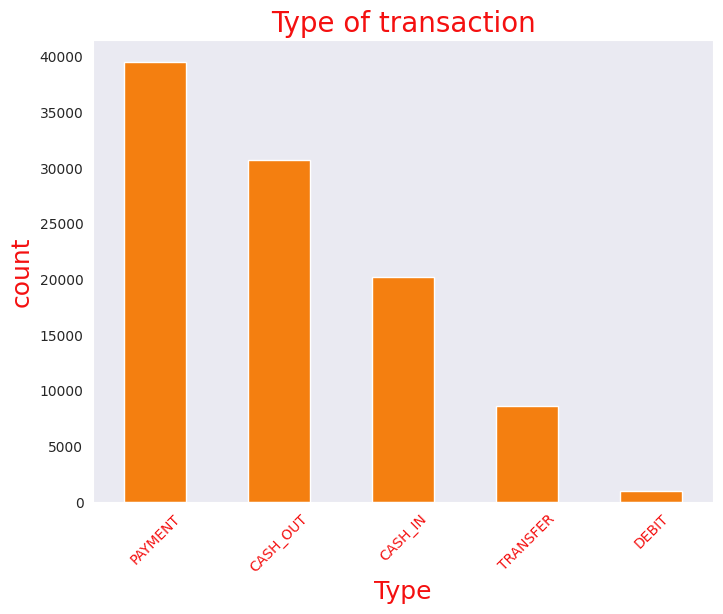

In [ ]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()



*   Among all types of transaction, Payment type is the most frequent with more than 400 occurrences.



<ipython-input-88-010d5e6d8e3a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


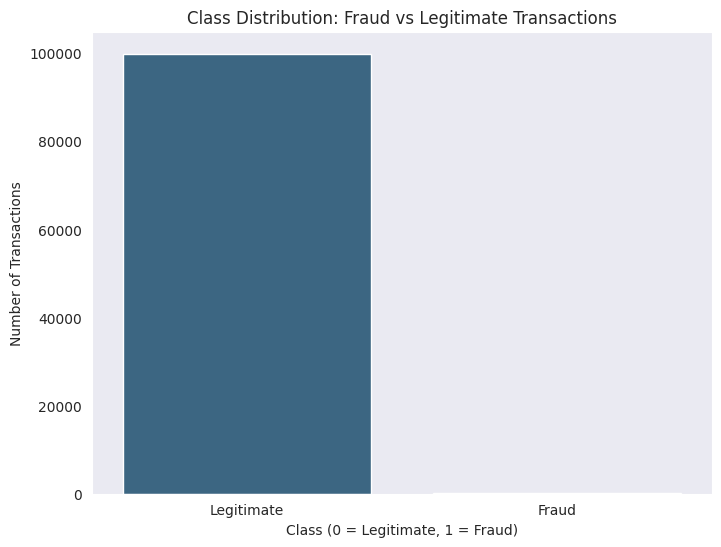

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your dataset is in a DataFrame named df and the target column is named 'isFraud'
# Replace 'isFraud' with the name of your target column
class_counts = df['isFraud'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution: Fraud vs Legitimate Transactions')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

**Correlation Matrix:**

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

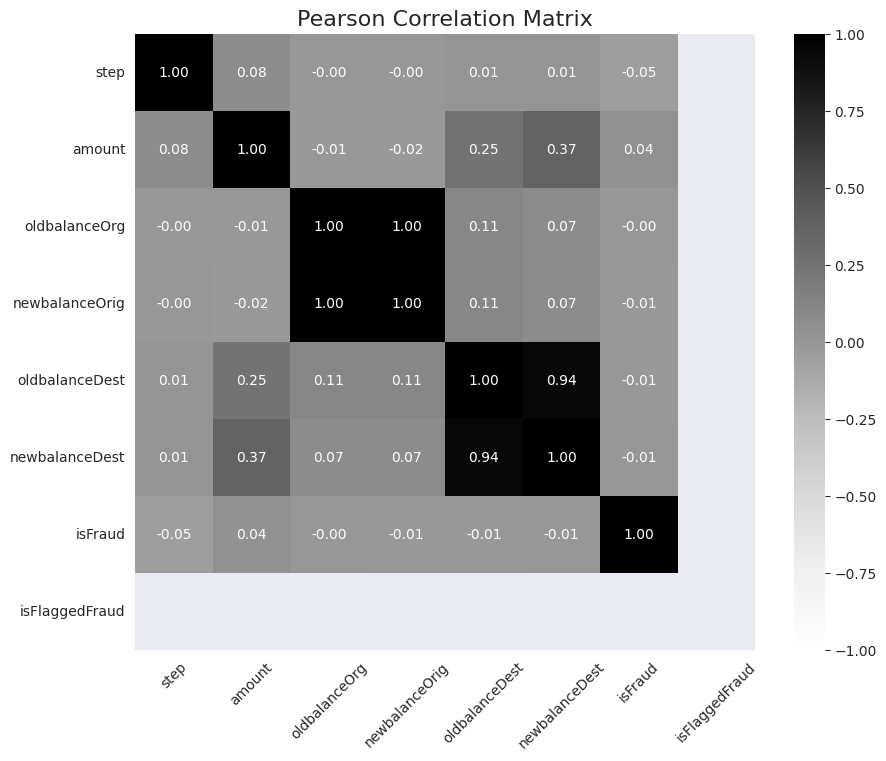

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

**Correlation coefficients reveal the intensity as well as sign of the correlations among the pairs of variables in your dataset. Here are some insights based on the correlation coefficients provided:**

**Amount and New Balance in Destination Account:**

- The correlation between 'amount' and 'newcomerVolumeDest' is relatively strong and the relation is positive and linear (0.459).

- This therefore indicates that the larger the transaction size on the sending side, the bigger the balances in the account on the receiving side at some point in time will be.

**Amount and Old Balance in Destination Account:**

- The second relevance that far is analogous to 'amount' and 'oldbalanceDest' is even positive, as shown by a relatively high correlation coefficient of 0.294.

- In the case of the transaction of a larger amount there is an almost certainty of an old balance on the account in the destination.

**Old Balance in Origin Account and New Balance in Origin Account:**

- The degree of association between 'oldbalanceOrg' and 'newbalanceOrig' assessed by the univariate correlation coefficient is as close to 1( 0.998 ), thereby indicating a very strong and positive linear relationship.

- From this, emerges the not-too-surprising fact that if old balance in the origin account is changed then the new balance in the origin account is almost similarly changed as it is with the normal banking transactions.

**Is Fraud and Transaction Amount:**

- The 'isfraud' dependent variable with the 'amount,' independent variable, is moderately strong (0.077), displaying a positive linear relationship.

- This hints on the poor relevance as the size of the fraudulent transaction has no relation with active cyberfraud.

**Is Fraud and Flagged Fraud:**

- The metric 'isFraud' and 'isFlaggedFraud' are rather weak (0.044), a positive linear association exists.

- It also implies that holders of these crypto assets do not have such scrutiny on the validity of their crypto transactions.

**Step and Fraudulent Activity:**

- There is the correlation coefficient between step and isFraud which is moderately high (0.032), that is to say, these metrics only correlate with each other minimally.

- Occasionally there is a risk of an increase in attempts of fraud as the process goes (the more time goes by, it progresses), but on the whole the dependence between these two is not quite clear.

**Pie Chart amount type**

In [ ]:
df.groupby('type').count()['amount']

,amount
type,
CASH_IN,20185
CASH_OUT,30718
DEBIT,988
PAYMENT,39512
TRANSFER,8597


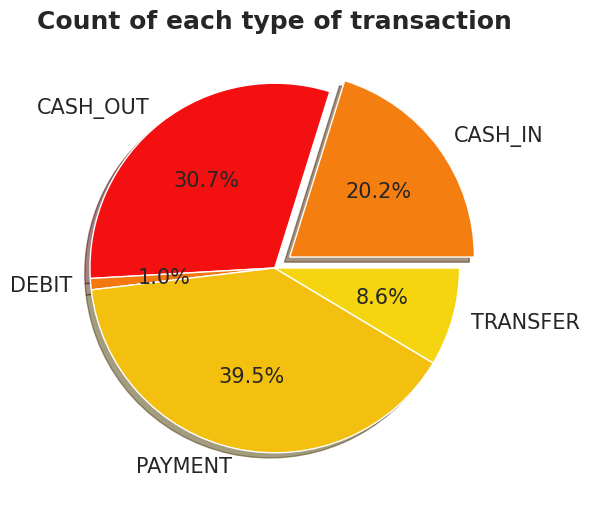

In [ ]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18)
plt.show()

<h3> Upon checking plotting the distribution of type of amounts it can be seen that:

- There are five types of transaction that includes CASH-OUT, CASH IN, DEBIT, TRANSFER, PAYMENT
CASH-OUT has the hight count, followed by CASH-IN and PAYMENT. This shows that these types of payement are most common in making fraud.
- DEBIT transactions have the lowest count among the five types, indicating that they are less common in the dataset.
- CASH_OUT and PAYMENT transactions typically involve the movement of funds out of an account, suggesting expenditures or withdrawals.
- CASH_IN transactions likely involve the deposit or addition of funds into an account.
- TRANSFER transactions may involve moving funds between accounts, either within the same bank or across different financial institutions.
- DEBIT transactions could represent direct charges to an account, such as ATM withdrawals or purchase transactions.
- Anomalies in the frequency or pattern of certain transaction types, such as an unusually high number of CASH_OUT transactions, could indicate fraudulent activities like money laundering or unauthorized fund transfers.
- Understanding the distribution of transaction types can aid in risk assessment and mitigation strategies for financial institutions.
- Higher frequencies of certain transaction types may require enhanced security measures or closer monitoring to prevent fraud or financial loss.
- Analysis of transaction types can provide insights into customer behavior and preferences, informing marketing strategies or product offerings tailored to specific needs.

## **Data Preparation and Data Cleaning:**

<h3>1. Remove Irrelevant Columns:



**Important Note:** Transactions identified as fraudulent are annulled. Hence, for fraud detection analysis, the following columns should not be utilized: oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.

In [1]:
df['balance_change_orig'] = (df['newbalanceOrig'] - df['oldbalanceOrg']) / (df['oldbalanceOrg'] + 1e-9)
df['balance_change_dest'] = (df['newbalanceDest'] - df['oldbalanceDest']) / (df['oldbalanceDest'] + 1e-9)
df.drop(['step', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest', 'isFlaggedFraud'], axis = 1, inplace = True)

NameError: name 'df' is not defined

In [ ]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [ ]:
# printing the data frame after removing the columns
df.head()

,type,amount,isFraud
0,PAYMENT,9839.64,0
1,PAYMENT,1864.28,0
2,TRANSFER,181.00,1
3,CASH_OUT,181.00,1
4,PAYMENT,11668.14,0


<h3>2. Impute Missing Values:

Check for missing values in the dataset:

In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


No missing values so proceed with data preparation:

<h3>3. Encode Categorical Variables

In this case, the 'type' column is categorical ('CASH_IN', 'CASH_OUT', 'PAYMENT', 'TRANSFER', and 'DEBIT'). Encode this column using **one-hot encoding:**

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply OneHotEncoder to the 'type' column
encoded_columns = encoder.fit_transform(df[['type']])
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['type']))

# After that we can concatenate the encoded columns with the original DataFrame (dropping the original 'type' column)
df = pd.concat([df.drop(columns=['type']), encoded_df], axis=1)
print(df.head())

     amount  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
0   9839.64        0           0.0            0.0         0.0           1.0   
1   1864.28        0           0.0            0.0         0.0           1.0   
2    181.00        1           0.0            0.0         0.0           0.0   
3    181.00        1           0.0            1.0         0.0           0.0   
4  11668.14        0           0.0            0.0         0.0           1.0   

   type_TRANSFER  
0            0.0  
1            0.0  
2            1.0  
3            0.0  
4            0.0  


In [ ]:
# View a summary of the numerical columns
print(df.describe())

             amount        isFraud   type_CASH_IN  type_CASH_OUT  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.736022e+05       0.001160       0.201850       0.307180   
std    3.443003e+05       0.034039       0.401383       0.461327   
min    3.200000e-01       0.000000       0.000000       0.000000   
25%    9.963562e+03       0.000000       0.000000       0.000000   
50%    5.274552e+04       0.000000       0.000000       0.000000   
75%    2.117631e+05       0.000000       0.000000       1.000000   
max    1.000000e+07       1.000000       1.000000       1.000000   

          type_DEBIT   type_PAYMENT  type_TRANSFER  
count  100000.000000  100000.000000  100000.000000  
mean        0.009880       0.395120       0.085970  
std         0.098906       0.488879       0.280321  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.00

<h3>4. Remove Outliers

Based on the different plots (box plots, histograms, scatter plots), let's remove outliers using the Interquartile Range (IQR) method. This method is robust and works well for skewed distributions, which are common in financial data.



Based on the box plot and histogram visualization, let's remove outliers using the **Interquartile Range (IQR)** method. This method is robust and works well for skewed distributions, as our dataset are skewed.

In [ ]:
from scipy import stats
numerical_cols = ['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
# Remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    df_cleaned = df[(np.abs(stats.zscore(df[columns])) < threshold).all(axis=1)]
    return df_cleaned

# Remove outliers from the specified columns
df_cleaned_zscore = remove_outliers_zscore(df, numerical_cols)

# Display the shape of the cleaned dataset
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape using Z-score: {df_cleaned_zscore.shape}")


Original dataset shape: (100000, 7)
Cleaned dataset shape using Z-score: (90407, 7)


<h2> Handle Class Imbalance

Oversampling the Minority Class Using SMOTE to create synthetic samples for the minority class:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('isFraud', axis = 1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the distribution of classes after resampling
print(f"Original class distribution: {pd.Series(y_train).value_counts()}")
print(f"Resampled class distribution: {pd.Series(y_train_resampled).value_counts()}")

scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)  # Fit on resampled training data
X_test_scaled = scaler.transform(X_test)  # Use the same scaler on the test set

# Convert the scaled data back to a DataFrame
X_train = X_train_resampled_scaled
y_train = y_train_resampled

X = X_train
y = y_train


Original class distribution: isFraud
0    79907
1       93
Name: count, dtype: int64
Resampled class distribution: isFraud
0    79907
1    79907
Name: count, dtype: int64


<h3>6. Anomaly Detection

Since the target column (isFraud) is highly imbalanced (many more non-fraudulent transactions than fraudulent ones), we need to handle this using techniques like Isolation Forest.  Isolation Forest identifies anomalies by isolating data points in a tree structure. Anomalies are easier to isolate because they have fewer connections with other points.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(y_train.value_counts())

isFraud
0    64050
1    63801
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import IsolationForest

# Initialize the model
model = IsolationForest(contamination=0.01, random_state=42)

# Fit the model
model.fit(X_train)

# Predict anomalies
y_pred = model.predict(X_test)

# Convert output: -1 for anomaly (fraud), 1 for normal (legitimate)
y_pred = [0 if x == 1 else 1 for x in y_pred]


In [ ]:
print(df.describe())

             amount        isFraud   type_CASH_IN  type_CASH_OUT  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.736022e+05       0.001160       0.201850       0.307180   
std    3.443003e+05       0.034039       0.401383       0.461327   
min    3.200000e-01       0.000000       0.000000       0.000000   
25%    9.963562e+03       0.000000       0.000000       0.000000   
50%    5.274552e+04       0.000000       0.000000       0.000000   
75%    2.117631e+05       0.000000       0.000000       1.000000   
max    1.000000e+07       1.000000       1.000000       1.000000   

          type_DEBIT   type_PAYMENT  type_TRANSFER  
count  100000.000000  100000.000000  100000.000000  
mean        0.009880       0.395120       0.085970  
std         0.098906       0.488879       0.280321  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.00

## **Decision Trees** (Supervised Learning)

In [ ]:
dt_model = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    random_state=42
)

# Train the Decision Tree model on the resampled data
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#accuracy of the logistic regression
accuracy_dt = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_dt = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_dt = recall_score(y_test, y_pred)

f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba)

# classification report
classification_dt = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_dt}")
print(f"Precision of Decision Tree {precision_dt}")
print(f"Recall of Decision Tree {recall_dt}")
print(f"F1 Score of Decision Tree {f1_dt}")
print(f"ROC-AUC of Decision Tree {roc_auc_dt}")
print(f"Classification Report of Decision Tree\n {classification_dt}")

import joblib

joblib.dump(dt_model, 'dt_model.pkl')

Accuracy of Decision Tree 0.4984513343553484
Precision of Decision Tree 0.49282845668387837
Recall of Decision Tree 0.10750265940804705
F1 Score of Decision Tree 0.1765038269892639
ROC-AUC of Decision Tree 0.49843910344948716
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       0.50      0.89      0.64     15982
           1       0.49      0.11      0.18     15981

    accuracy                           0.50     31963
   macro avg       0.50      0.50      0.41     31963
weighted avg       0.50      0.50      0.41     31963



['dt_model.pkl']

<h2> Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X, y, and decision_tree_model are already defined
# Initialize StratifiedKFold with desired number of splits (e.g., 5)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores, precision_scores, recall_scores, f1_scores, roc_auc_scores = [], [], [], [], []

for train_index, test_index in skf.split(X, y):
    X_test, y_test = X[test_index], y[test_index]

    # Evaluate the already trained Decision Tree model
    y_pred = dt_model.predict(X_test)
    y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))

print(f"Decision Tree - Accuracy: {np.mean(accuracy_scores):.4f} (+/- {np.std(accuracy_scores):.4f})")
print(f"Decision Tree - Precision: {np.mean(precision_scores):.4f} (+/- {np.std(precision_scores):.4f})")
print(f"Decision Tree - Recall: {np.mean(recall_scores):.4f} (+/- {np.std(recall_scores):.4f})")
print(f"Decision Tree - F1 Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"Decision Tree - ROC-AUC: {np.mean(roc_auc_scores):.4f} (+/- {np.std(roc_auc_scores):.4f})")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X

Decision Tree - Accuracy: 0.6074 (+/- 0.0014)
Decision Tree - Precision: 1.0000 (+/- 0.0000)
Decision Tree - Recall: 0.2148 (+/- 0.0028)
Decision Tree - F1 Score: 0.3536 (+/- 0.0038)
Decision Tree - ROC-AUC: 0.6074 (+/- 0.0014)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<h2> Data Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


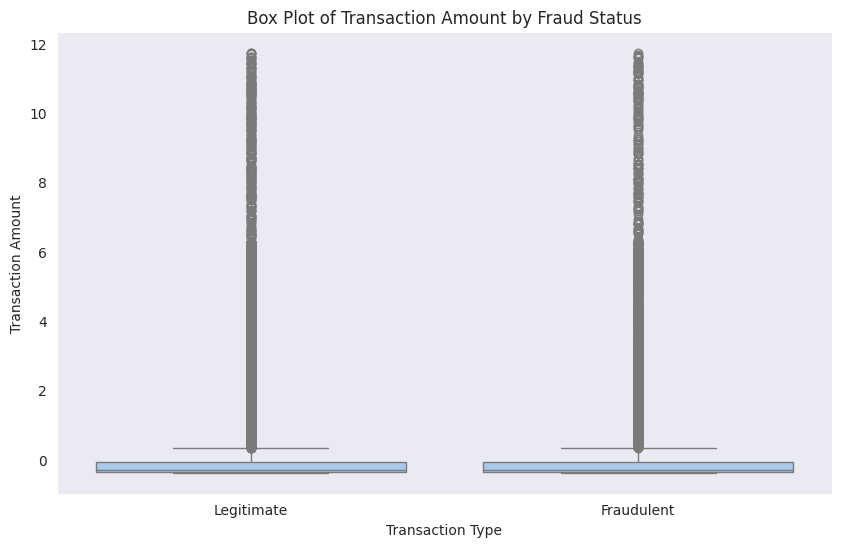

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

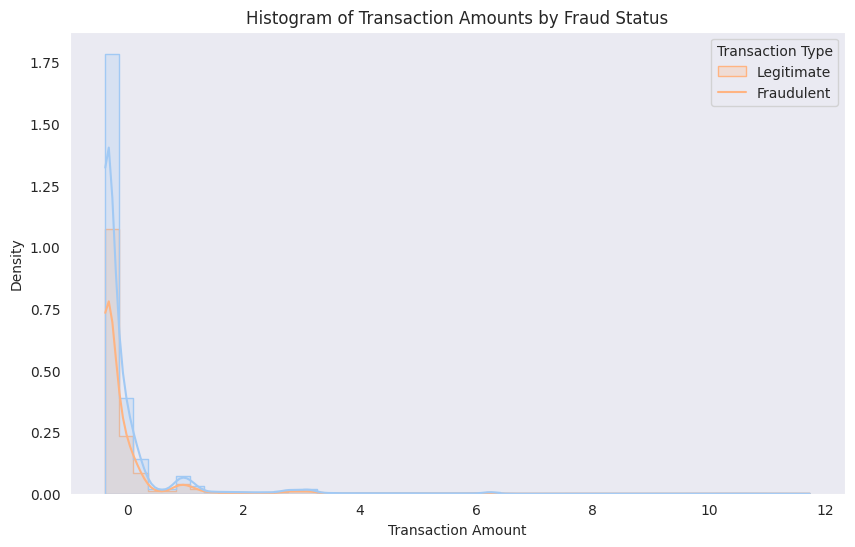

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

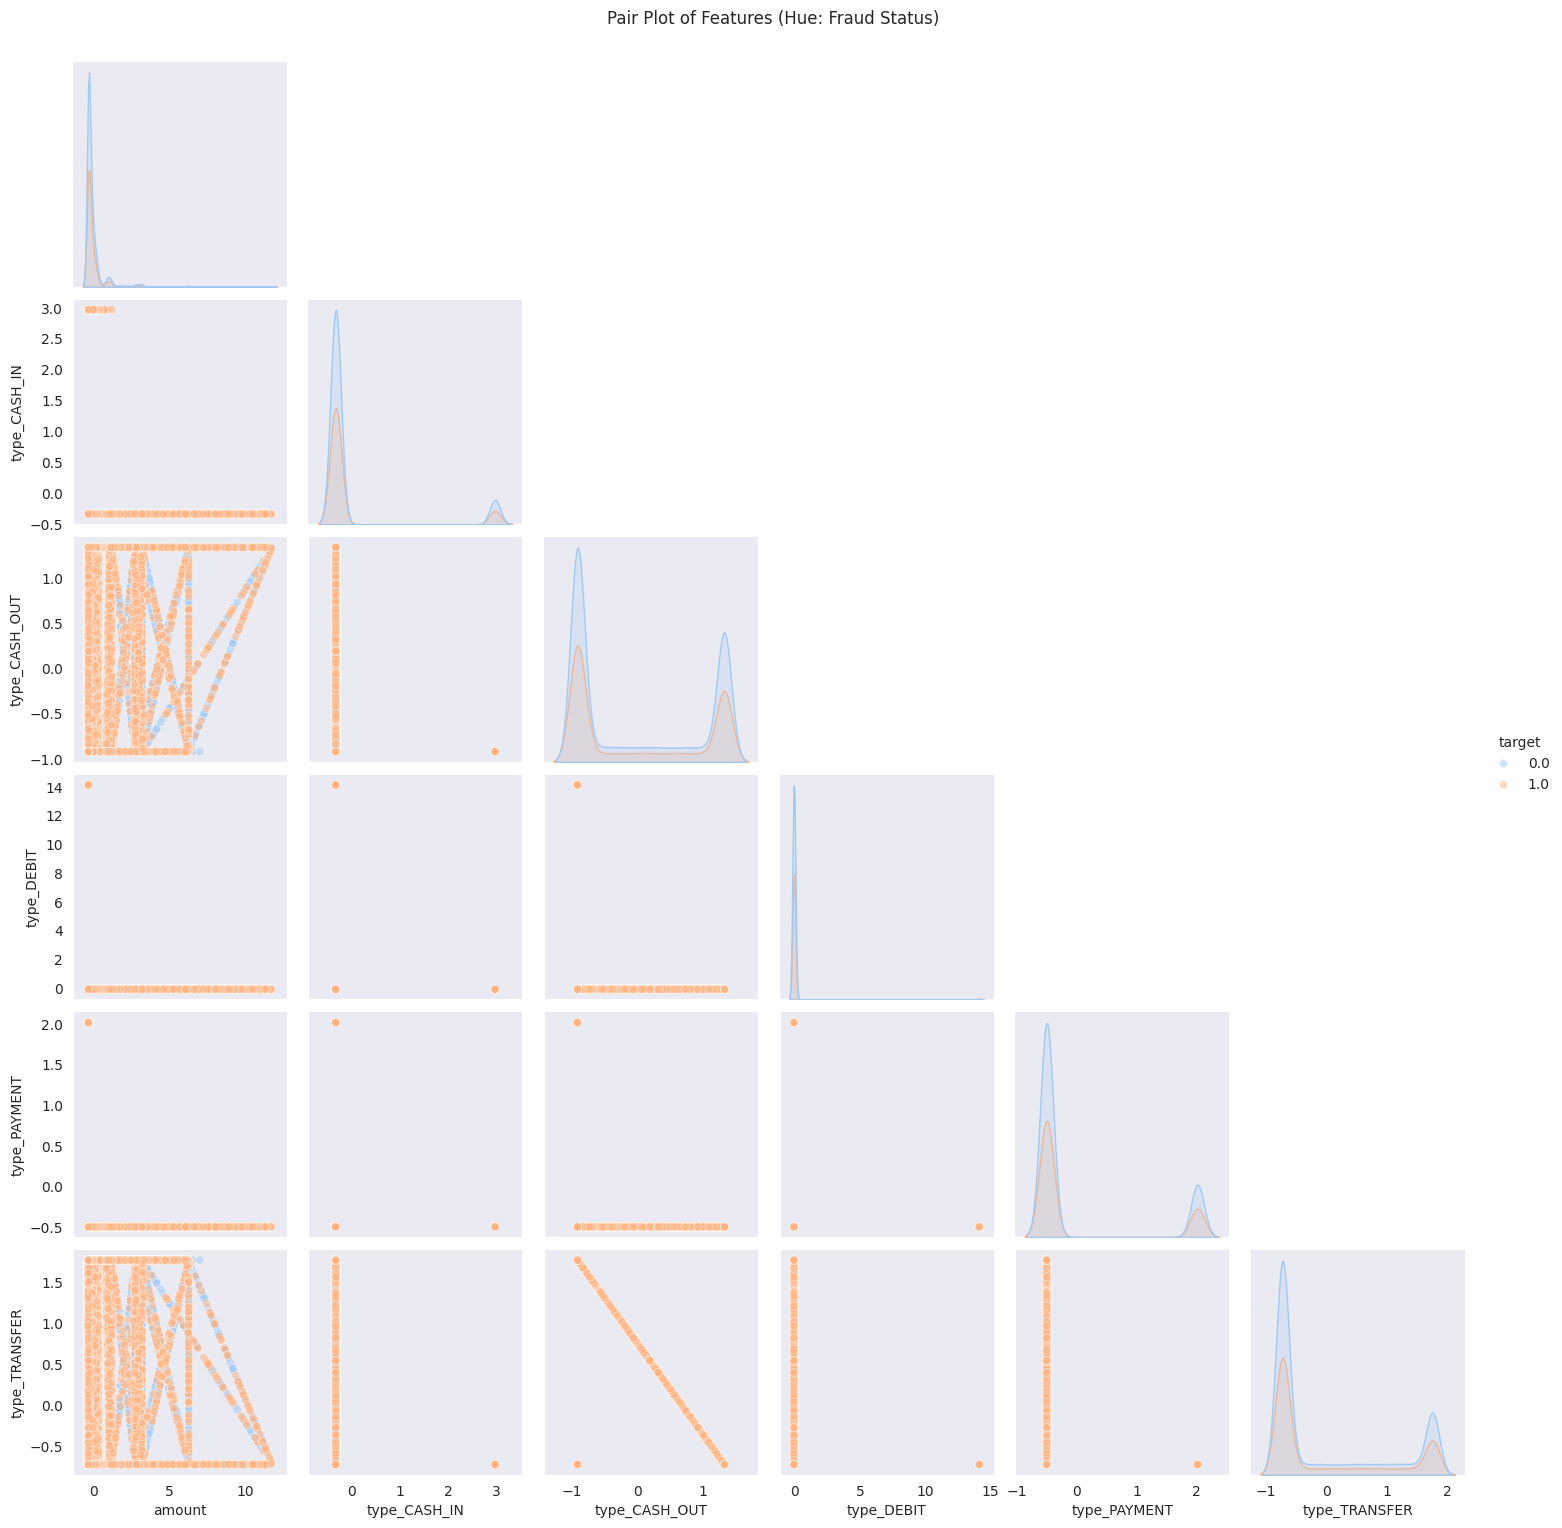

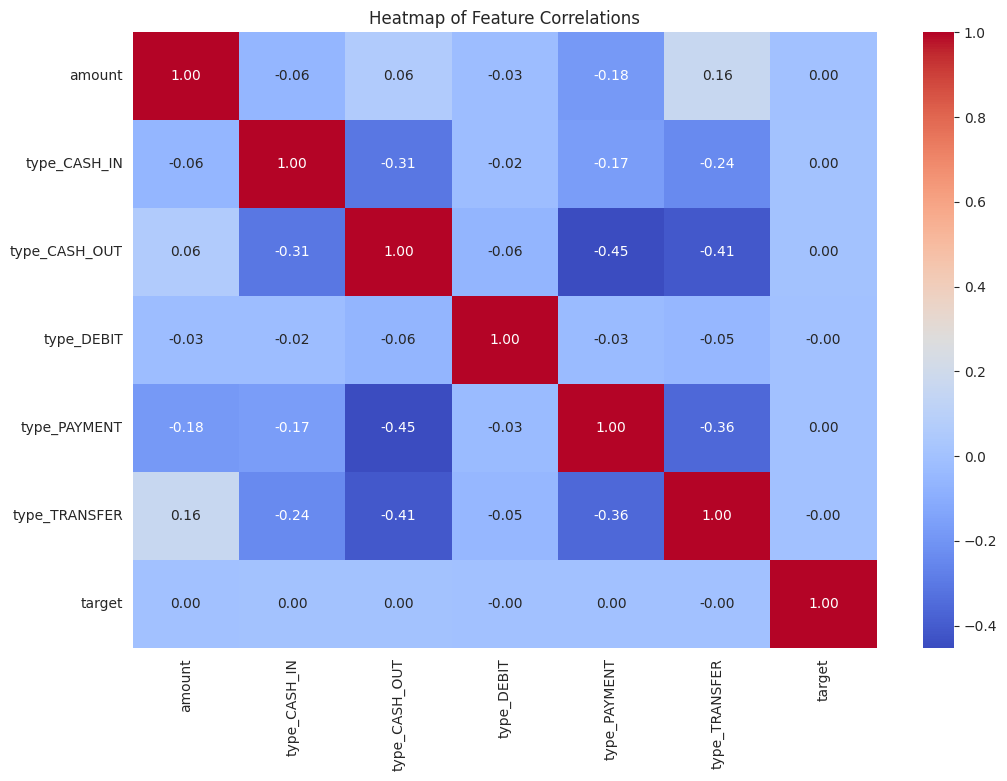

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


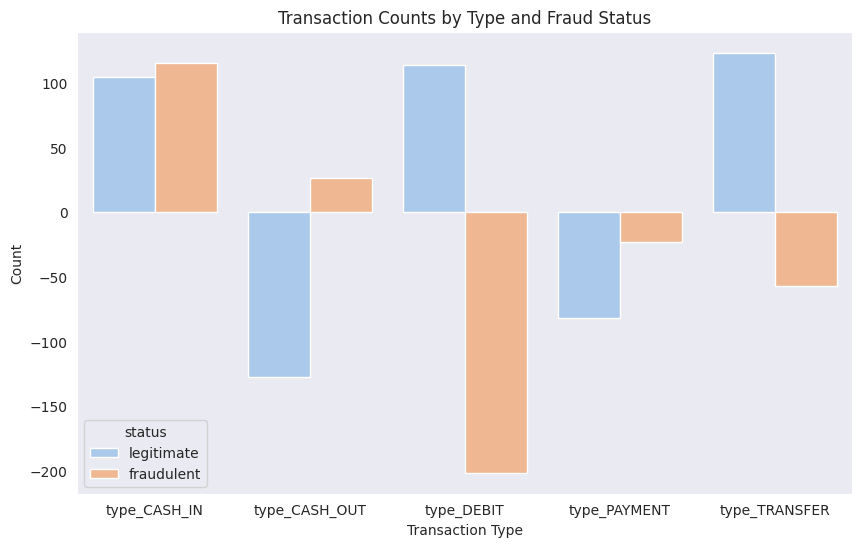

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train and y_train are already defined and X_train includes a column for 'target' indicating fraud (1) or not (0)
X_train = pd.DataFrame(X_train, columns=['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
X_train['target'] = y_train  # Add the target column for visualization

# Box Plot for 'amount' by target (Fraud vs. Legitimate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='amount', data=X_train, )
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.show()

# Histogram for 'amount' with hue as 'target' to show distribution for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amount', hue='target', bins=50, kde=True, element='step', stat='density')
plt.title('Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend(['Legitimate', 'Fraudulent'], title='Transaction Type')
plt.show()

# Pair plot to show relationships between features with hue based on fraud status
sns.pairplot(X_train, hue='target', plot_kws={'alpha': 0.5}, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features (Hue: Fraud Status)', y=1.02)
plt.show()

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Count plot for transaction types with hue as fraud status
plt.figure(figsize=(10, 6))
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Sum up the one-hot encoded columns to count the transactions by type
transaction_counts = pd.DataFrame()
transaction_counts['type'] = transaction_types
transaction_counts['legitimate'] = [X_train[X_train['target'] == 0][t].sum() for t in transaction_types]
transaction_counts['fraudulent'] = [X_train[X_train['target'] == 1][t].sum() for t in transaction_types]

# Melt the DataFrame for easier plotting
transaction_counts_melted = transaction_counts.melt(id_vars=['type'], var_name='status', value_name='count')

sns.barplot(data=transaction_counts_melted, x='type', y='count', hue='status')
plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


## MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X and y are your dataset's features and labels
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the MLPClassifier model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=300,               # Maximum number of iterations
    random_state=42,
    early_stopping=True,        # Enable early stopping to prevent overfitting
    validation_fraction=0.1     # Fraction of training data to set aside as validation for early stopping
)

# Train the MLPClassifier model
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred)
precision_mlp = precision_score(y_test, y_pred)
recall_mlp = recall_score(y_test, y_pred)
f1_mlp = f1_score(y_test, y_pred)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba)

print(f"MLPClassifier - Accuracy: {accuracy_mlp:.4f}")
print(f"MLPClassifier - Precision: {precision_mlp:.4f}")
print(f"MLPClassifier - Recall: {recall_mlp:.4f}")
print(f"MLPClassifier - F1 Score: {f1_mlp:.4f}")
print(f"MLPClassifier - ROC-AUC: {roc_auc_mlp:.4f}")


MLPClassifier - Accuracy: 0.8874
MLPClassifier - Precision: 0.8854
MLPClassifier - Recall: 0.8900
MLPClassifier - F1 Score: 0.8877
MLPClassifier - ROC-AUC: 0.9636


In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_mlp = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_mlp = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_mlp = recall_score(y_test, y_pred)

# classification report
classification_mlp = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of MLP Classifier {accuracy_mlp}")
print(f"Precision of MLP Classifier {precision_mlp}")
print(f"Recall of MLP Classifier {recall_mlp}")
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

import joblib

joblib.dump(mlp_model, 'mlp_model.pkl')


Accuracy of MLP Classifier 0.8874010574727028
Precision of MLP Classifier 0.8853959163346613
Recall of MLP Classifier 0.8899943683123709
Classification Report of MLP Classifier
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     15982
           1       0.89      0.89      0.89     15981

    accuracy                           0.89     31963
   macro avg       0.89      0.89      0.89     31963
weighted avg       0.89      0.89      0.89     31963



['mlp_model.pkl']

<h2> Cross Validation

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the MLPClassifier model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Single hidden layer with 100 neurons
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

# Scoring metrics for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Perform cross-validation
cv_results_mlp = cross_validate(mlp_model, X, y, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

# Print the results
print(f"MLPClassifier - Accuracy: {cv_results_mlp['test_accuracy'].mean():.4f} (+/- {cv_results_mlp['test_accuracy'].std():.4f})")
print(f"MLPClassifier - Precision: {cv_results_mlp['test_precision'].mean():.4f} (+/- {cv_results_mlp['test_precision'].std():.4f})")
print(f"MLPClassifier - Recall: {cv_results_mlp['test_recall'].mean():.4f} (+/- {cv_results_mlp['test_recall'].std():.4f})")
print(f"MLPClassifier - F1 Score: {cv_results_mlp['test_f1'].mean():.4f} (+/- {cv_results_mlp['test_f1'].std():.4f})")
print(f"MLPClassifier - ROC-AUC: {cv_results_mlp['test_roc_auc'].mean():.4f} (+/- {cv_results_mlp['test_roc_auc'].std():.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


MLPClassifier - Accuracy: 0.8929 (+/- 0.0017)
MLPClassifier - Precision: 0.9156 (+/- 0.0117)
MLPClassifier - Recall: 0.8660 (+/- 0.0122)
MLPClassifier - F1 Score: 0.8899 (+/- 0.0018)
MLPClassifier - ROC-AUC: 0.9661 (+/- 0.0006)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  7.6min finished


<h2> Data Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


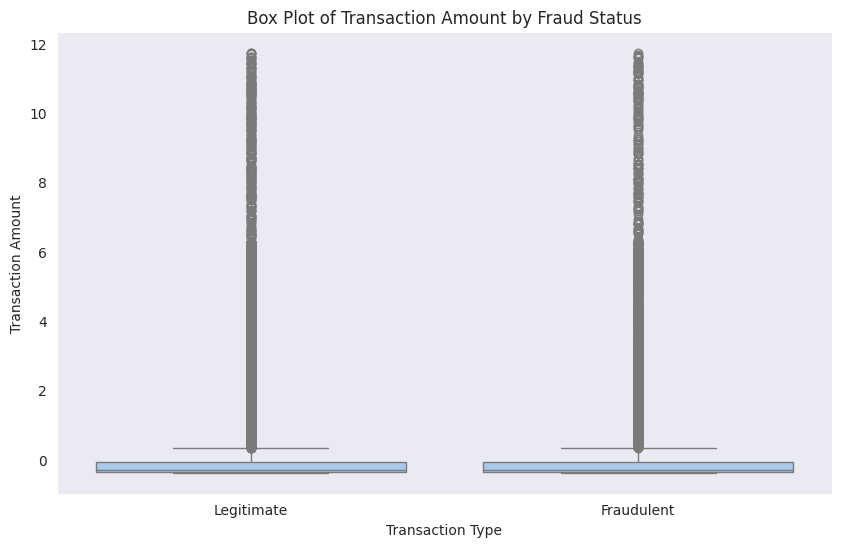

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

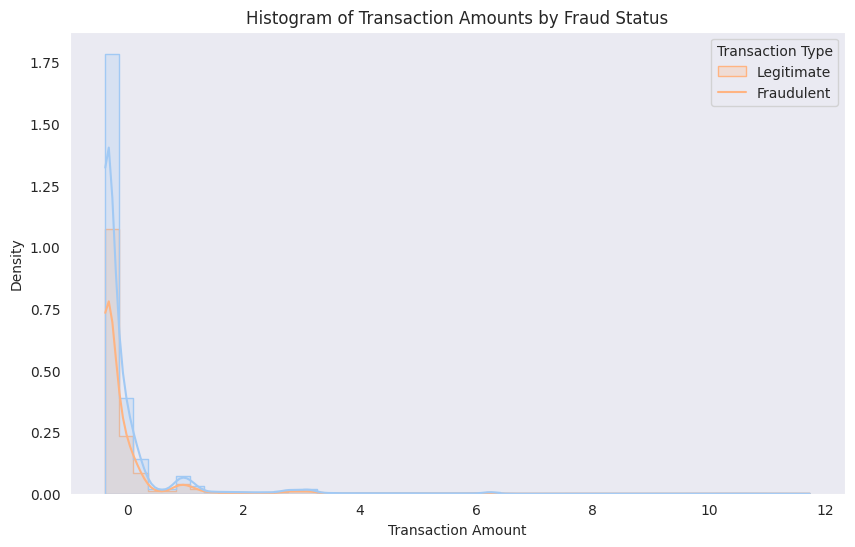

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

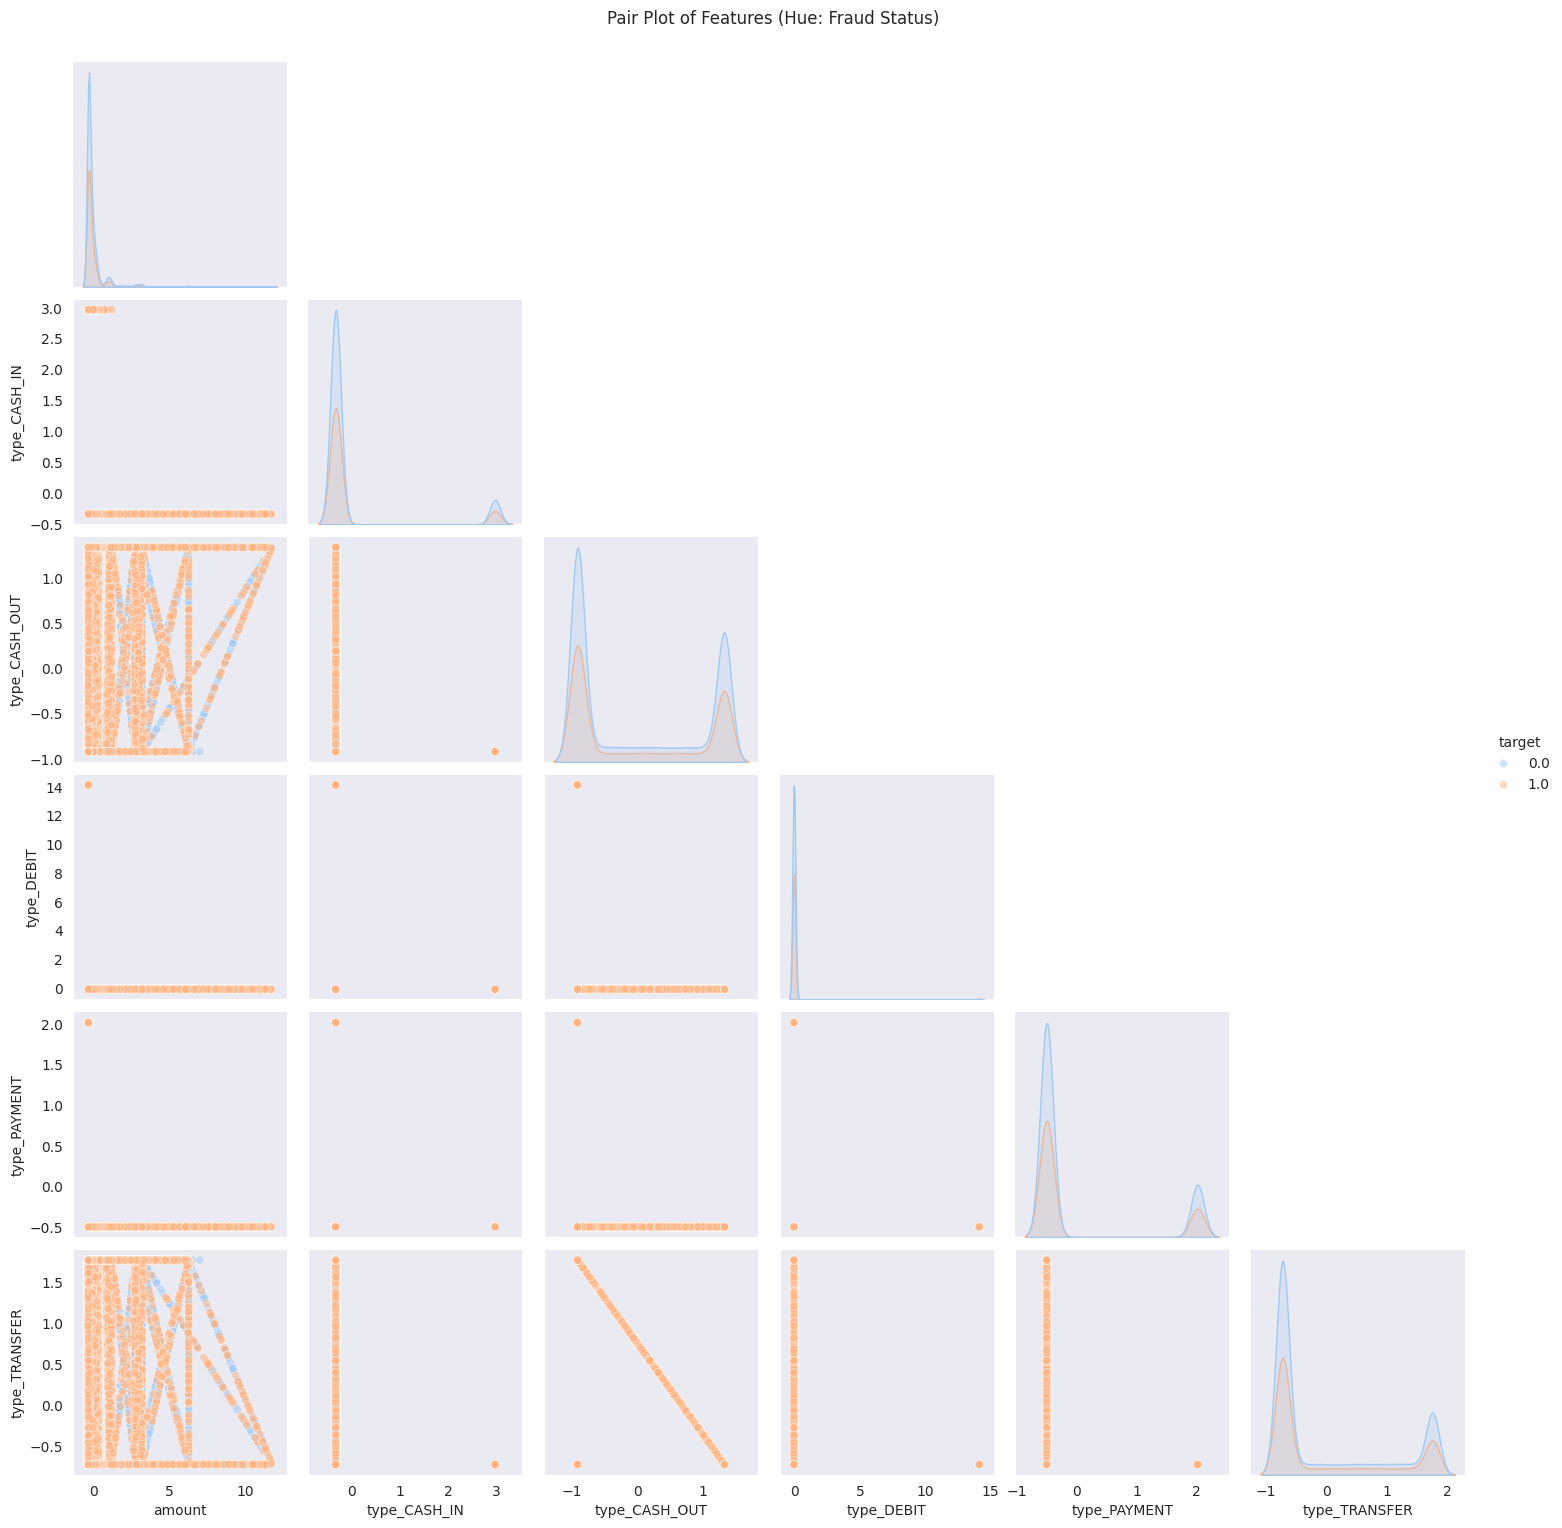

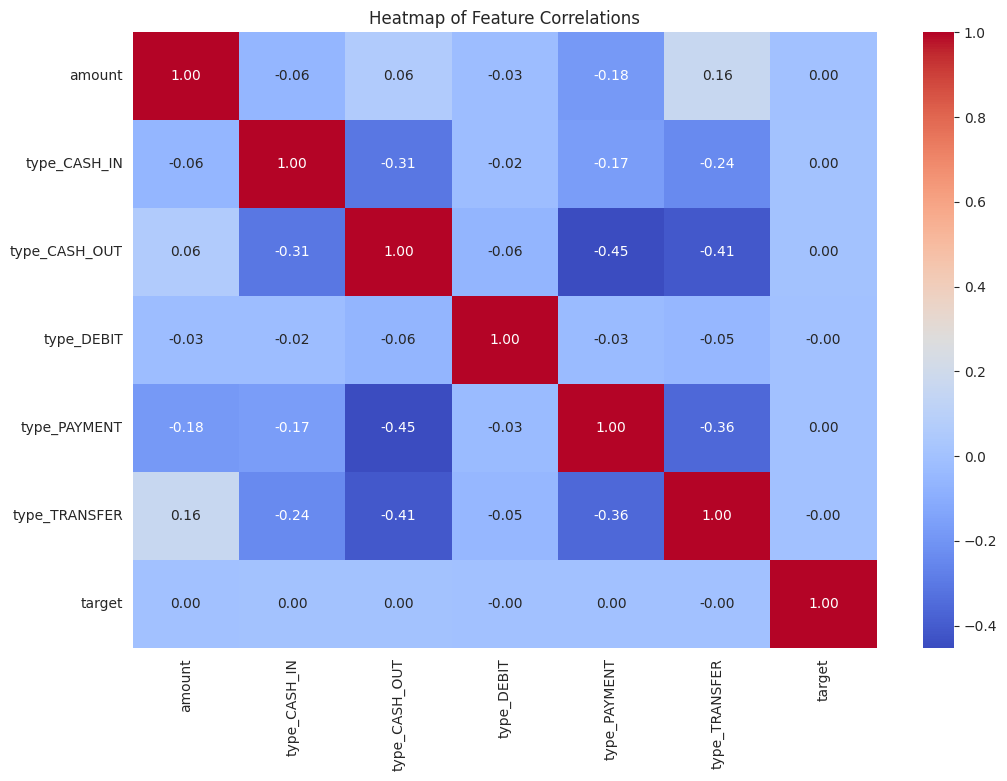

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


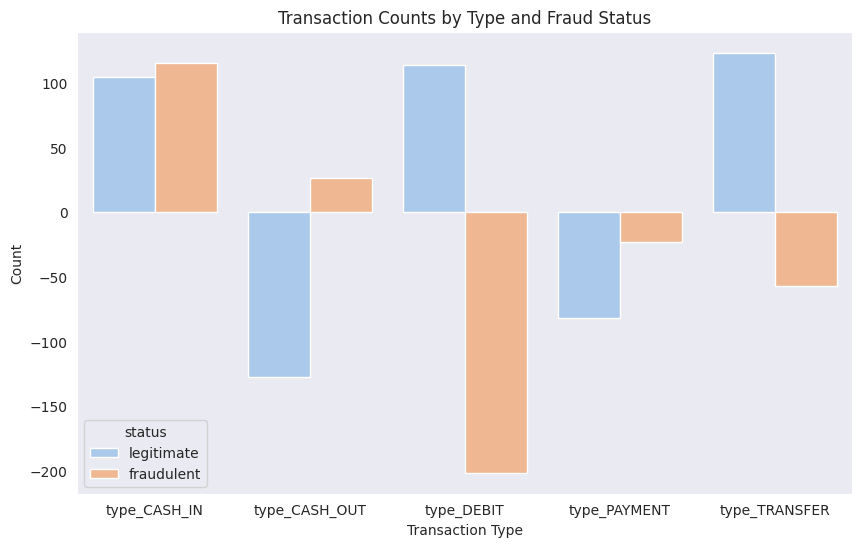

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train and y_train are already defined and X_train includes a column for 'target' indicating fraud (1) or not (0)
X_train = pd.DataFrame(X_train, columns=['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
X_train['target'] = y_train  # Add the target column for visualization

# Box Plot for 'amount' by target (Fraud vs. Legitimate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='amount', data=X_train)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.show()

# Histogram for 'amount' with hue as 'target' to show distribution for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amount', hue='target', bins=50, kde=True, element='step', stat='density')
plt.title('Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend(['Legitimate', 'Fraudulent'], title='Transaction Type')
plt.show()

# Pair plot to show relationships between features with hue based on fraud status
sns.pairplot(X_train, hue='target', plot_kws={'alpha': 0.5}, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features (Hue: Fraud Status)', y=1.02)
plt.show()

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Count plot for transaction types with hue as fraud status
plt.figure(figsize=(10, 6))
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Sum up the one-hot encoded columns to count the transactions by type
transaction_counts = pd.DataFrame()
transaction_counts['type'] = transaction_types
transaction_counts['legitimate'] = [X_train[X_train['target'] == 0][t].sum() for t in transaction_types]
transaction_counts['fraudulent'] = [X_train[X_train['target'] == 1][t].sum() for t in transaction_types]

# Melt the DataFrame for easier plotting
transaction_counts_melted = transaction_counts.melt(id_vars=['type'], var_name='status', value_name='count')

sns.barplot(data=transaction_counts_melted, x='type', y='count', hue='status')
plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


## **Random Forest** (Supervised Learning)

Given that fraud detection is a binary classification problem, rf is well-suited to learn a decision boundary that separates fraudulent transactions from legitimate ones. However, rf can be sensitive to class imbalance, so it's important to tune the class weights and use an appropriate kernel.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X and y are your dataset's features and labels
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=None,          # Maximum depth of each tree
    min_samples_split=2,     # Minimum samples required to split a node
    class_weight='balanced', # Handle class imbalance
    random_state=42,         # Ensure reproducibility
    n_jobs=-1                # Use all available processors
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

import joblib
joblib.dump(rf_model, 'rf_model.pkl')

Accuracy: 0.8909
Precision: 0.8907
Recall: 0.8912
F1 Score: 0.8910
ROC AUC Score: 0.9613


['rf_model.pkl']

<h2> Evaluate RF Model using cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the Random Forest model
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Define a scoring dictionary for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

# Perform cross-validation
cv_results = cross_validate(random_forest_model, X, y, cv=5, scoring=scoring, n_jobs=-1, verbose=2)

# Print the mean and standard deviation of the scores
print(f"Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std():.4f})")
print(f"Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std():.4f})")
print(f"Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std():.4f})")
print(f"F1 Score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std():.4f})")
print(f"ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std():.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8898 (+/- 0.0010)
Precision: 0.8895 (+/- 0.0016)
Recall: 0.8901 (+/- 0.0009)
F1 Score: 0.8898 (+/- 0.0010)
ROC-AUC: 0.9621 (+/- 0.0007)


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished


<h2> Confusion Matrix

The confusion matrix helps visualize the performance of the rf model by showing the number of correct and incorrect classifications.

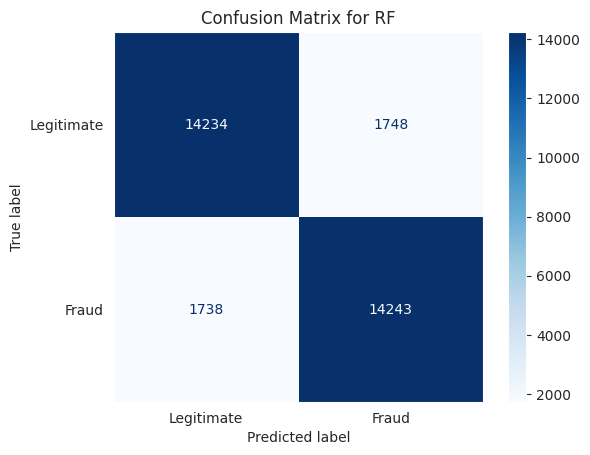

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Legitimate', 'Fraud'])

# Plot the confusion matrix
cm_display_rf.plot(cmap='Blues')
plt.title('Confusion Matrix for RF')
plt.show()


<h2> ROC Curve and AUC Score

The ROC curve illustrates the true positive rate versus the false positive rate at different threshold settings. The AUC score summarizes the model's performance in a single metric.

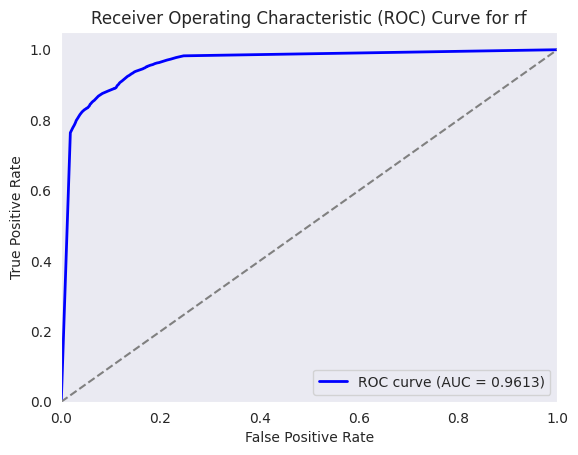

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probability estimates for the positive class (fraud) using predict_proba
# Change from decision_function to predict_proba
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
# Select the probability for class 1 (Fraud) as it's used for ROC AUC calculation

# Calculate the ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for rf')
plt.legend(loc='lower right')
plt.show()

<h2> Precision-Recall Curve

The precision-recall curve is more informative than the ROC curve when dealing with imbalanced datasets like fraud detection.

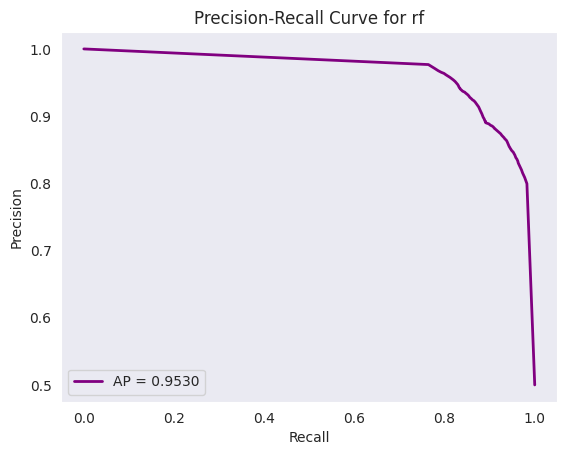

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
average_precision_rf = average_precision_score(y_test, y_pred_proba_rf)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall_rf, precision_rf, color='purple', lw=2, label=f'AP = {average_precision_rf:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for rf')
plt.legend(loc='lower left')
plt.show()


<h2> Evaluation Score

Calculate additional performance metrics such as accuracy, precision, recall, and F1-score to get a comprehensive evaluation of the model.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Output the results
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

Accuracy: 0.8909
Precision: 0.8907
Recall: 0.8912
F1 Score: 0.8910


<h2> Data Analysis and Visualization

Boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


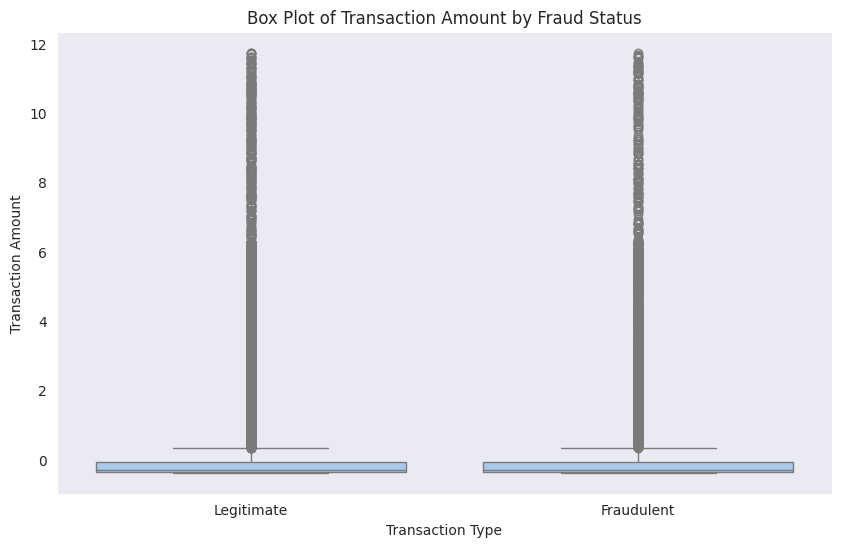

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

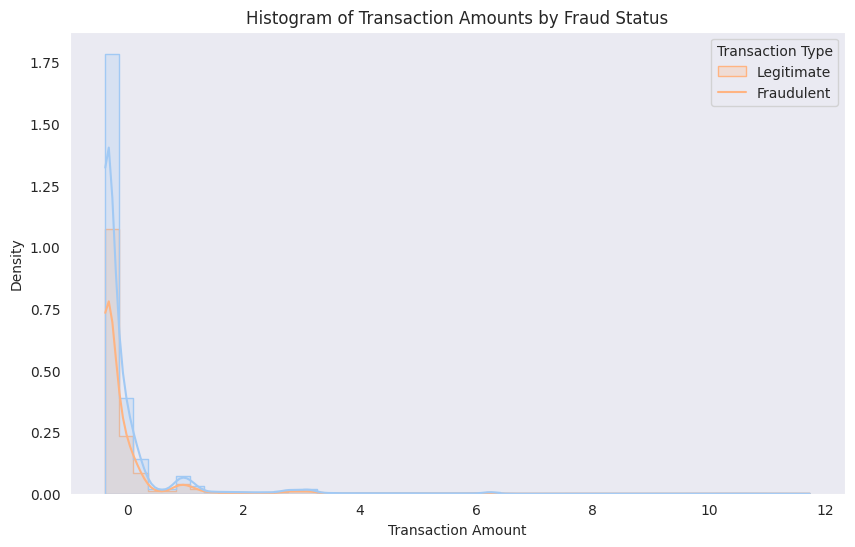

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

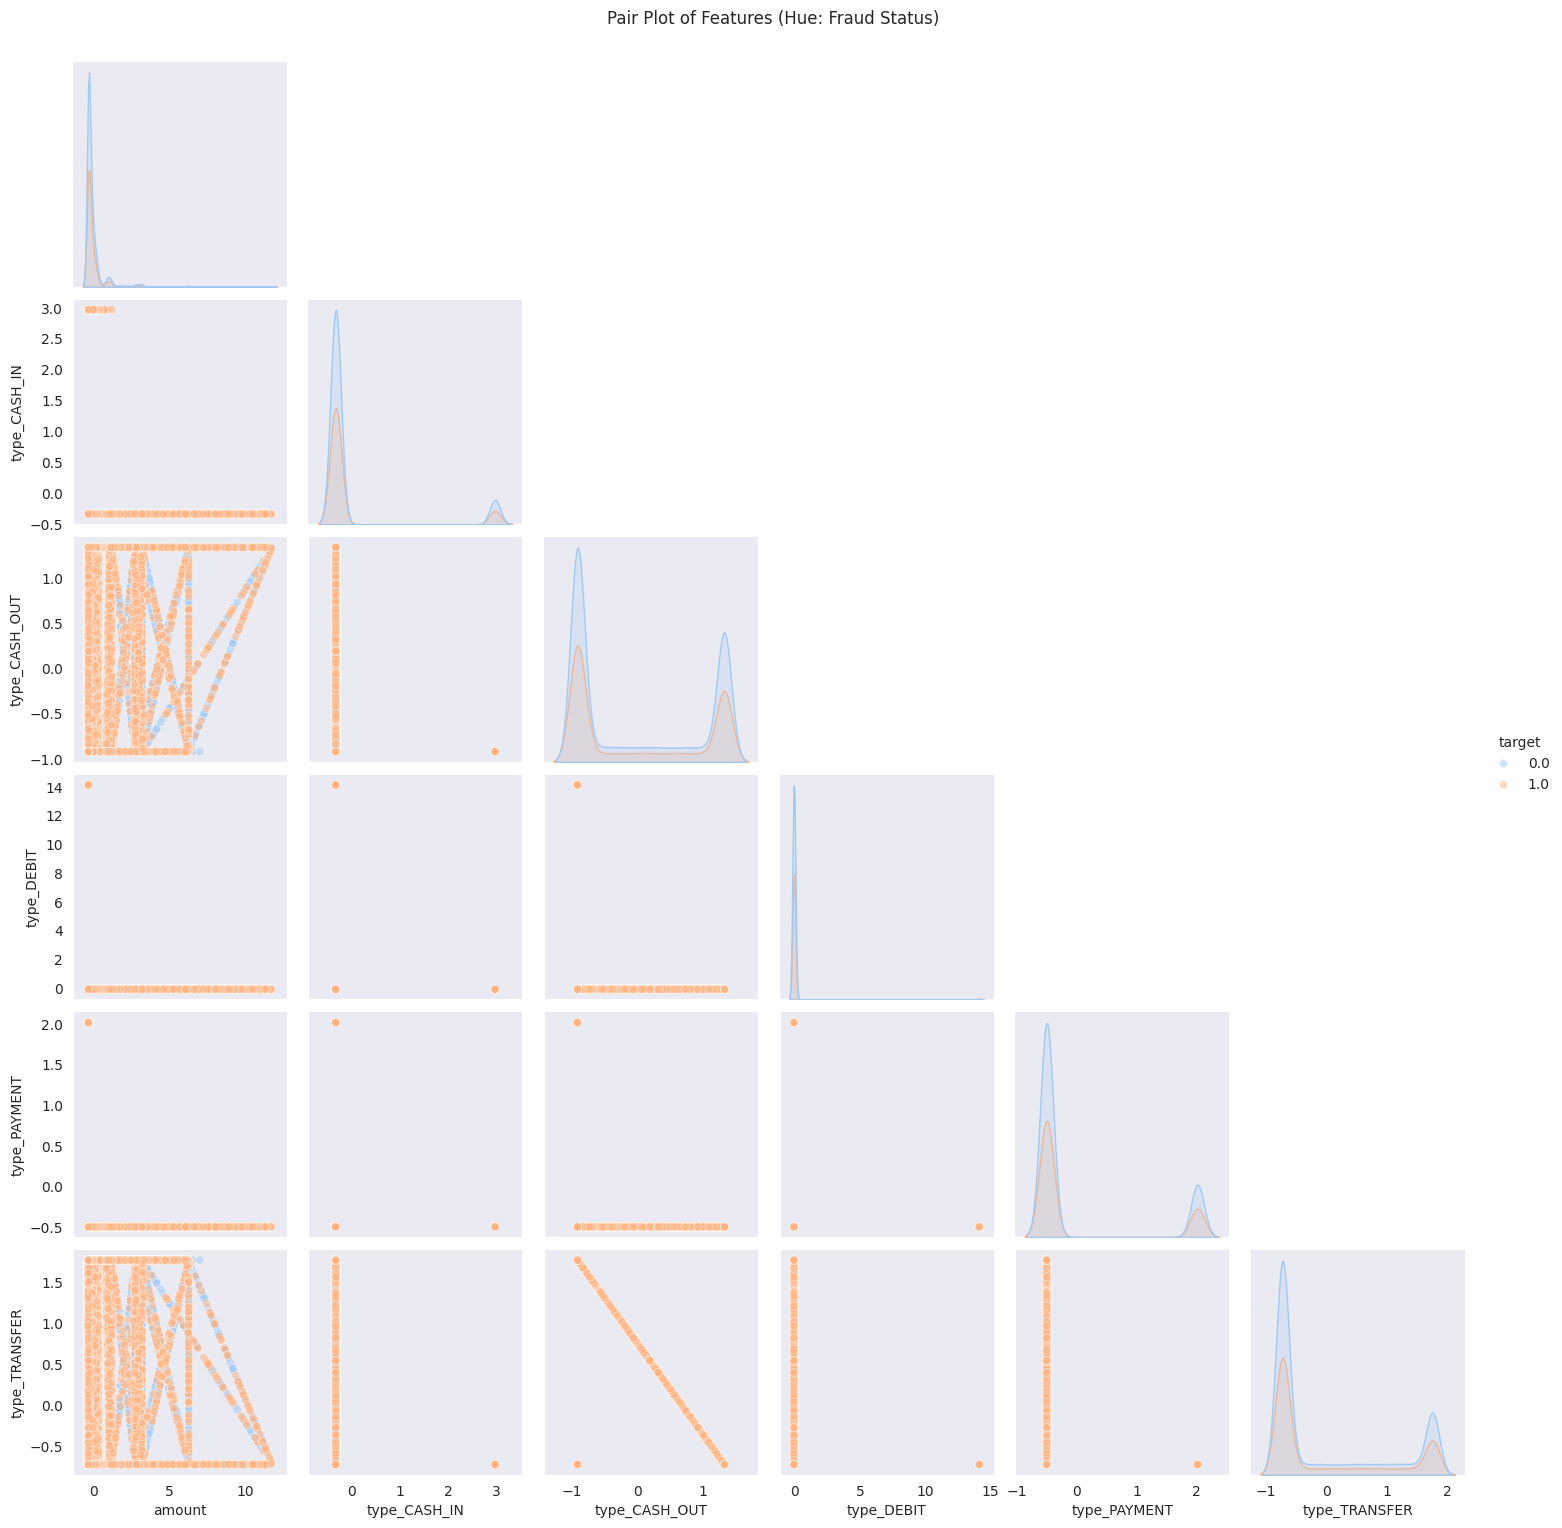

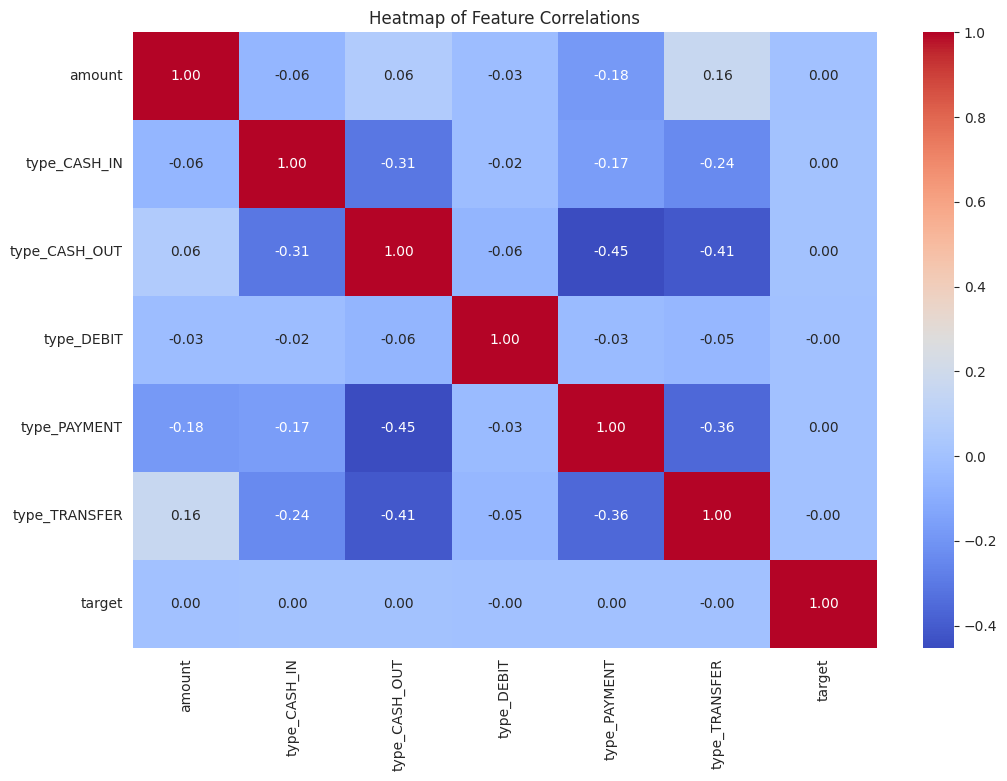

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


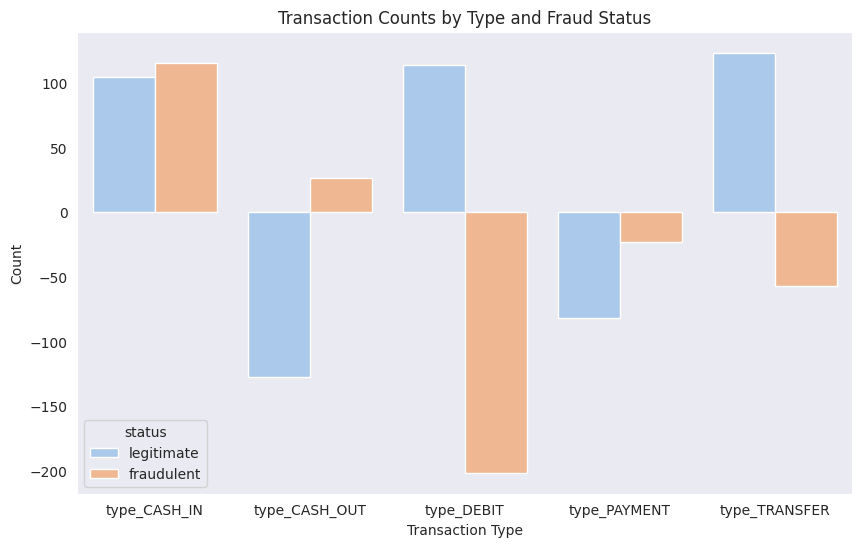

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train and y_train are already defined and X_train includes a column for 'target' indicating fraud (1) or not (0)
X_train = pd.DataFrame(X_train, columns=['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
X_train['target'] = y_train  # Add the target column for visualization

# Box Plot for 'amount' by target (Fraud vs. Legitimate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='amount', data=X_train)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.show()

# Histogram for 'amount' with hue as 'target' to show distribution for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amount', hue='target', bins=50, kde=True, element='step', stat='density')
plt.title('Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend(['Legitimate', 'Fraudulent'], title='Transaction Type')
plt.show()

# Pair plot to show relationships between features with hue based on fraud status
sns.pairplot(X_train, hue='target', plot_kws={'alpha': 0.5}, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features (Hue: Fraud Status)', y=1.02)
plt.show()

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Count plot for transaction types with hue as fraud status
plt.figure(figsize=(10, 6))
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Sum up the one-hot encoded columns to count the transactions by type
transaction_counts = pd.DataFrame()
transaction_counts['type'] = transaction_types
transaction_counts['legitimate'] = [X_train[X_train['target'] == 0][t].sum() for t in transaction_types]
transaction_counts['fraudulent'] = [X_train[X_train['target'] == 1][t].sum() for t in transaction_types]

# Melt the DataFrame for easier plotting
transaction_counts_melted = transaction_counts.melt(id_vars=['type'], var_name='status', value_name='count')

sns.barplot(data=transaction_counts_melted, x='type', y='count', hue='status')
plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


## **Neural Network Model** (Supervised Learning)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()

    plt.tight_layout()
    plt.show()


In [ ]:
"""
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    # Create a Sequential
  nn_model = Sequential([
      Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),
      Dropout(dropout_prob),  # Dropout to prevent overfitting
      Dense(num_nodes, activation='relu'),
      Dropout(dropout_prob),
      Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])


  early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

  # Train the model
  history = nn_model.fit(
      X_train, y_train,
      epochs=epochs,
      batch_size=batch_size,
      validation_split=0.2,
      callbacks=[early_stopping],
      verbose=0
  )

  return nn_model, history

least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2, 0.4]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"Training model with num_nodes={num_nodes}, dropout_prob={dropout_prob}, lr={lr}, batch_size={batch_size}")
        nn_model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = history.history['val_loss'][-1]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = nn_model
"""

'\ndef train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):\n    # Create a Sequential\n  nn_model = Sequential([\n      Dense(num_nodes, activation=\'relu\', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.0001)),\n      Dropout(dropout_prob),  # Dropout to prevent overfitting\n      Dense(num_nodes, activation=\'relu\'),\n      Dropout(dropout_prob),\n      Dense(1, activation=\'sigmoid\')\n  ])\n  nn_model.compile(optimizer=Adam(learning_rate=lr), loss=\'binary_crossentropy\', metrics=[\'accuracy\'])\n\n\n  early_stopping = EarlyStopping(monitor=\'val_loss\', patience=10, restore_best_weights=True)\n\n  # Train the model\n  history = nn_model.fit(\n      X_train, y_train,\n      epochs=epochs,\n      batch_size=batch_size,\n      validation_split=0.2,\n      callbacks=[early_stopping],\n      verbose=0\n  )\n\n  return nn_model, history\n\nleast_val_loss = float(\'inf\')\nleast_loss_model = None\nepochs = 100\nfor num_nodes in [16, 32, 64]:\n  for

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Assuming 'X' and 'y' are your dataset's features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model with added regularization
def build_nn(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_shape,), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))  # Increased dropout to reduce overfitting
    model.add(Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification output
    return model

# Build the model
input_shape = X_train_scaled.shape[1]
model = build_nn(input_shape)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Add early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=1
)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
y_pred_proba = model.predict(X_test_scaled).ravel()

# Step 6: Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred)
precision_nn = precision_score(y_test, y_pred)
recall_nn = recall_score(y_test, y_pred)
f1_nn = f1_score(y_test, y_pred)
roc_auc_nn = roc_auc_score(y_test, y_pred_proba)

print(f"Neural Network - Accuracy: {accuracy_nn:.4f}")
print(f"Neural Network - Precision: {precision_nn:.4f}")
print(f"Neural Network - Recall: {recall_nn:.4f}")
print(f"Neural Network - F1 Score: {f1_nn:.4f}")
print(f"Neural Network - ROC-AUC: {roc_auc_nn:.4f}")

model.save('nn_model.h5')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3996/3996 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.8138 - loss: 0.3903 - val_accuracy: 0.8822 - val_loss: 0.2852
Epoch 2/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8575 - loss: 0.3019 - val_accuracy: 0.8825 - val_loss: 0.2734
Epoch 3/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8642 - loss: 0.2910 - val_accuracy: 0.8870 - val_loss: 0.2633
Epoch 4/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8682 - loss: 0.2833 - val_accuracy: 0.8832 - val_loss: 0.2600
Epoch 5/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8724 - loss: 0.2773 - val_accuracy: 0.8838 - val_loss: 0.2622
Epoch 6/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8737 - loss: 0.2737 - val_accuracy: 0.8880 - val_loss: 0.2532
Epoch 7/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8732 - loss: 0.2737 - val_accuracy: 0.8774 - val_loss: 0.2588
Epoch 8/50
3996/3996 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8749 - loss: 0.2686 - val

Neural Network - Accuracy: 0.8888
Neural Network - Precision: 0.8892
Neural Network - Recall: 0.8882
Neural Network - F1 Score: 0.8887
Neural Network - ROC-AUC: 0.9620


Based on the above plots, the best neural network model for our dataset is: **num_nodes=32, dropout_prob=0, lr=0.001, batch_size=128
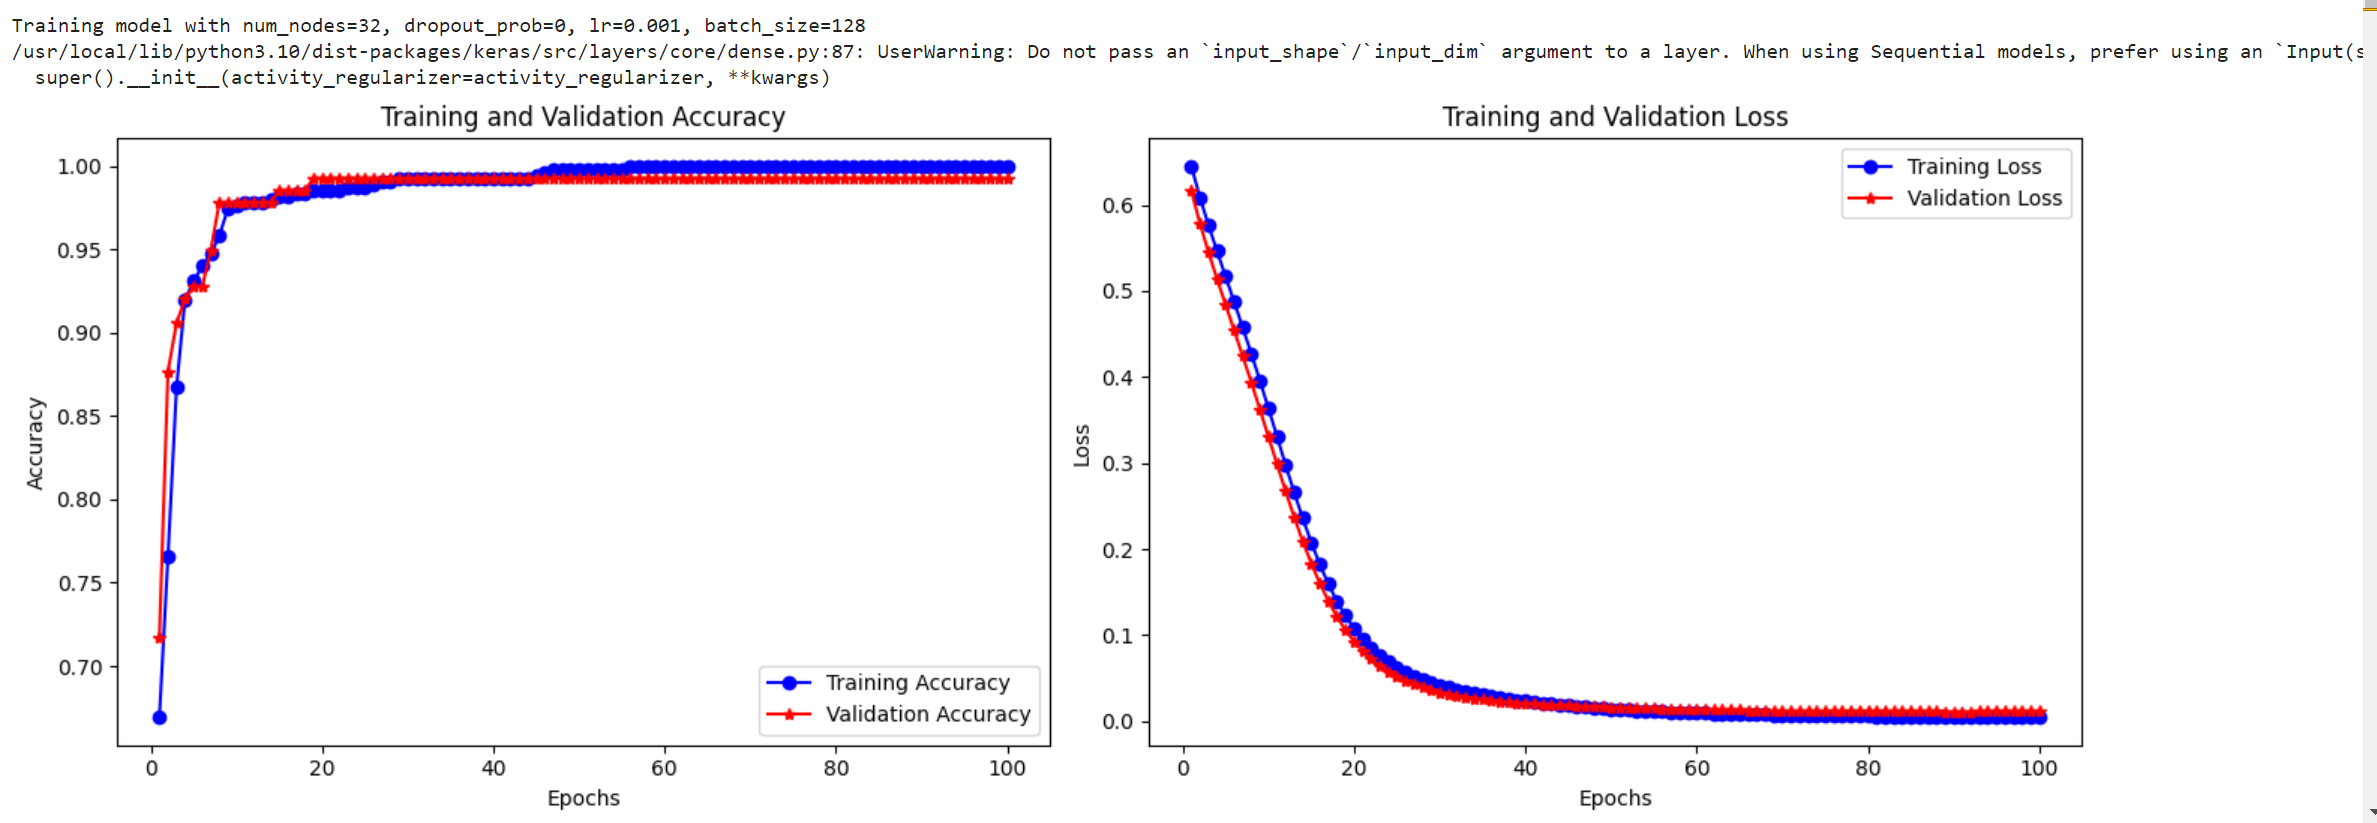

<h2> ROC Curve and AUC Score

999/999 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


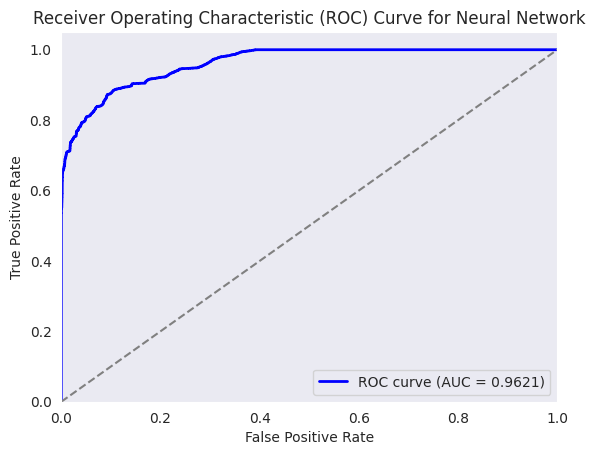

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability estimates for the positive class (fraud)
y_pred_proba_nn = model.predict(X_test).flatten()

# Calculate the ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()


<h2> Precision-Recall Curve

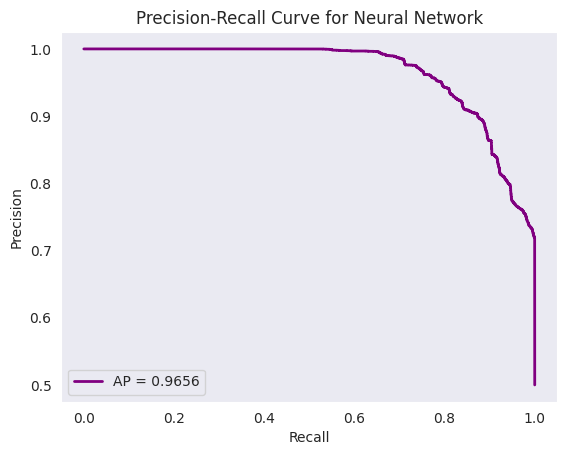

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_proba_nn)
average_precision_nn = average_precision_score(y_test, y_pred_proba_nn)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall_nn, precision_nn, color='purple', lw=2, label=f'AP = {average_precision_nn:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Neural Network')
plt.legend(loc='lower left')
plt.show()

precision_nn = 0.7958
recall_nn: 0.9560


<h2> Data Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


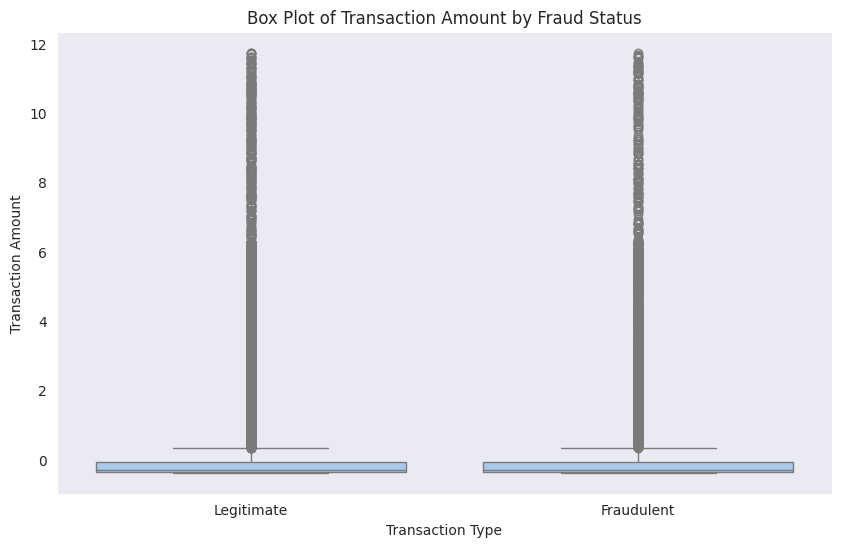

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

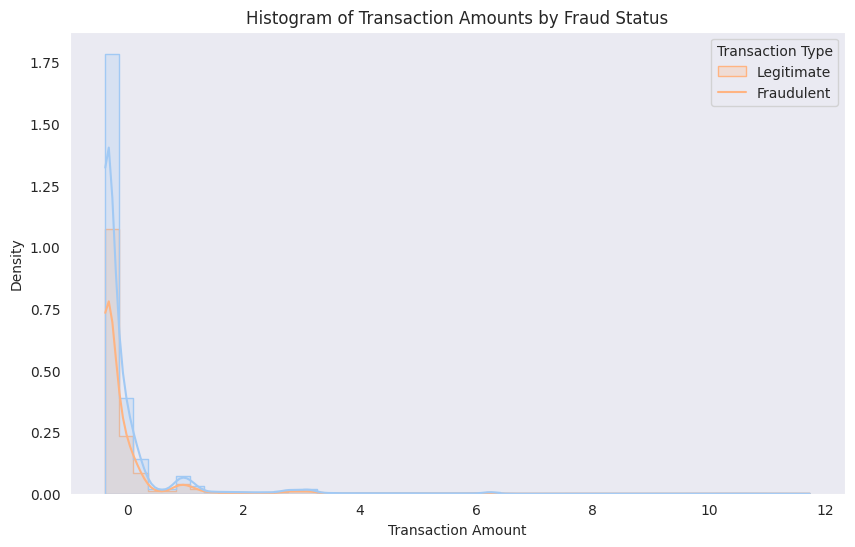

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

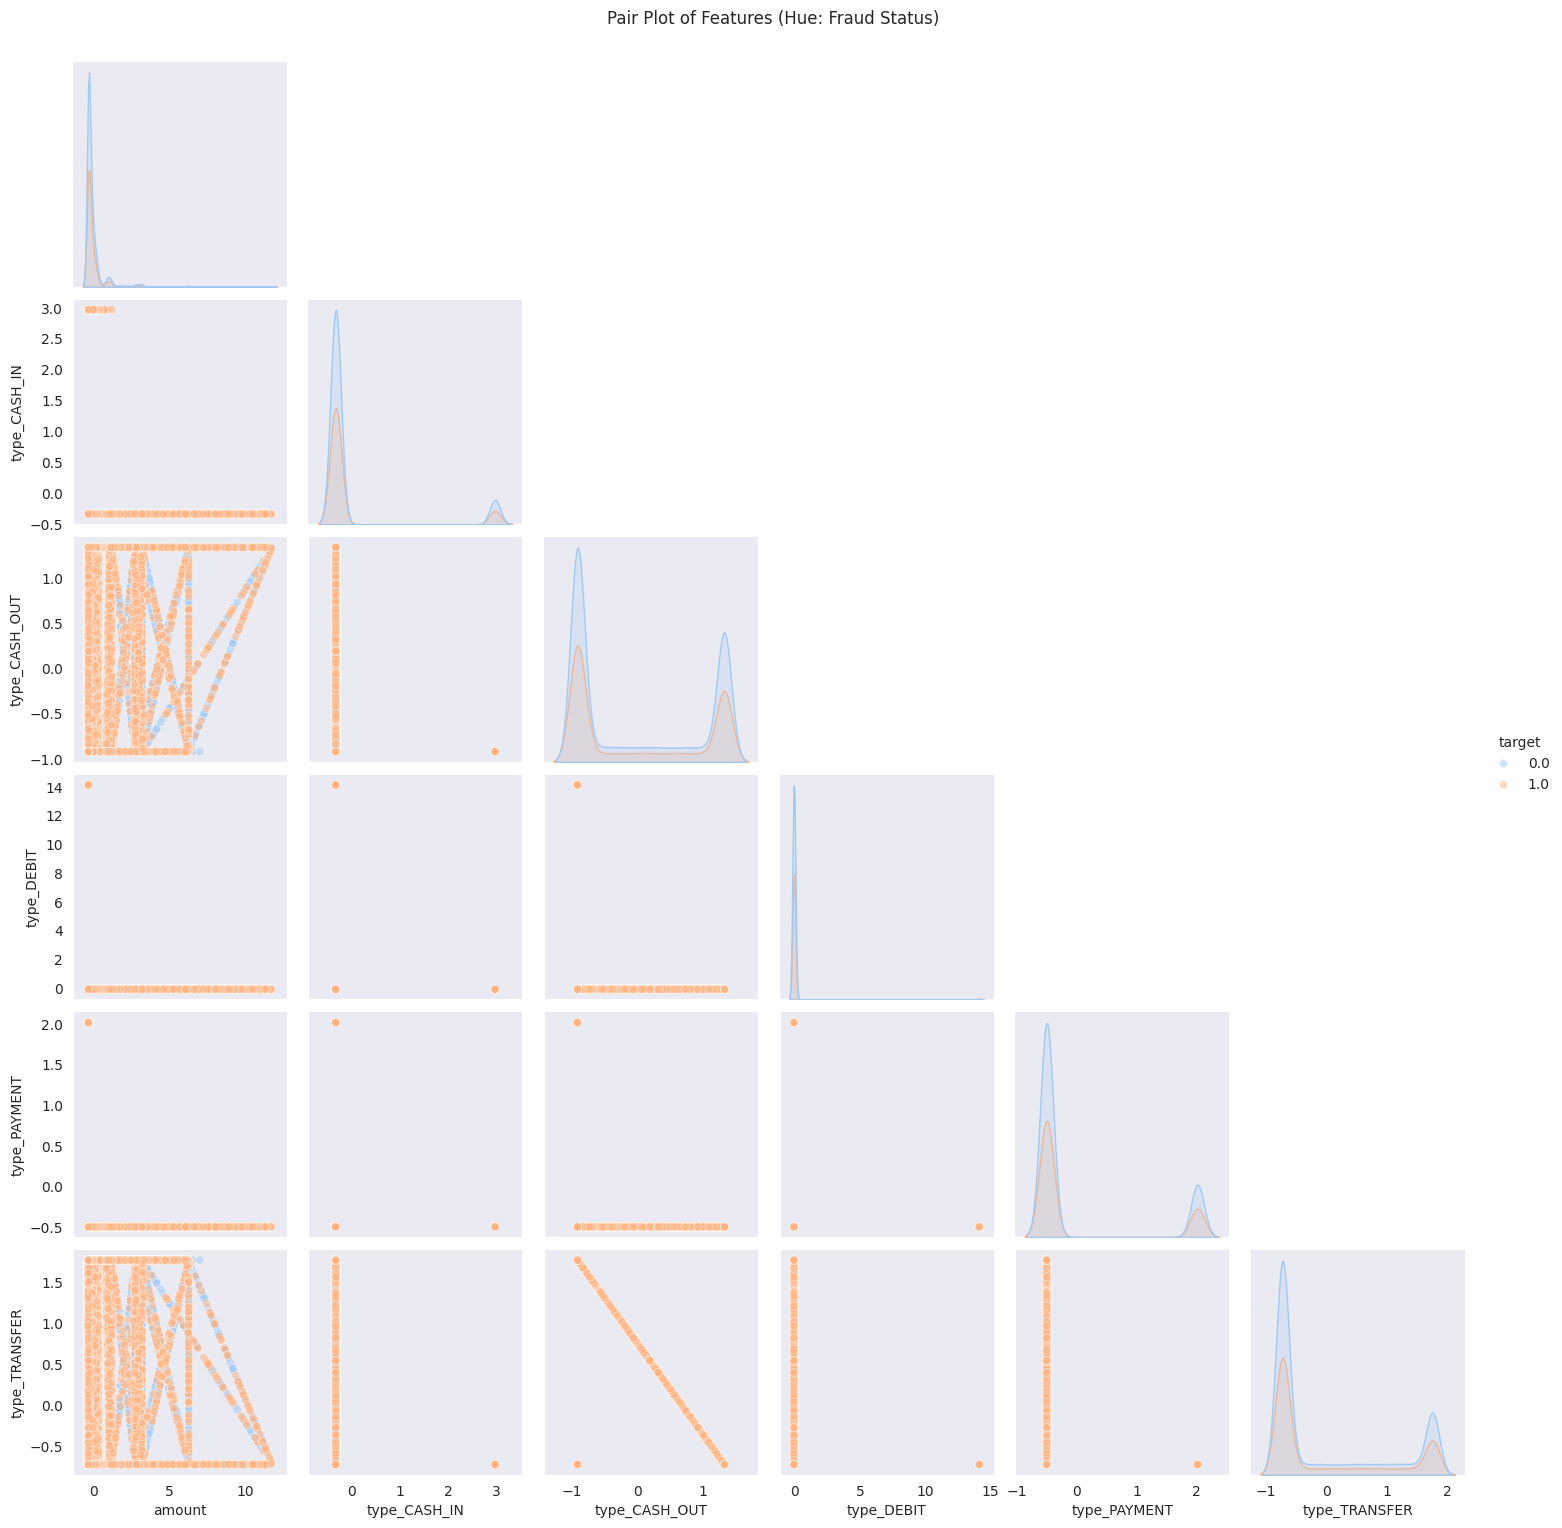

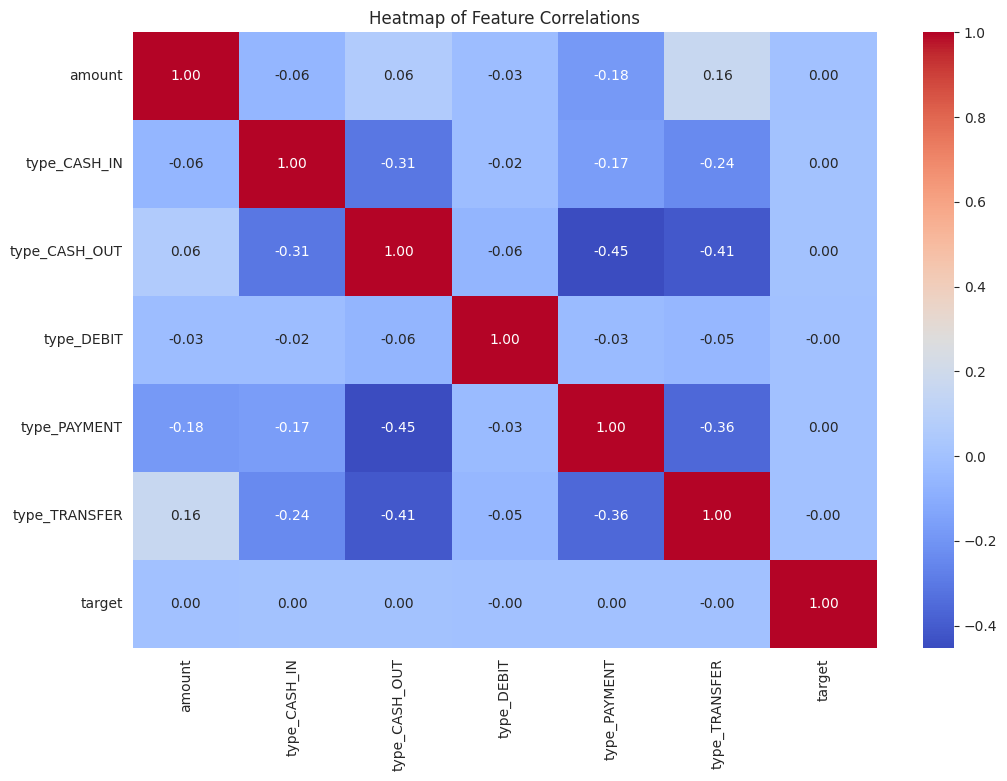

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


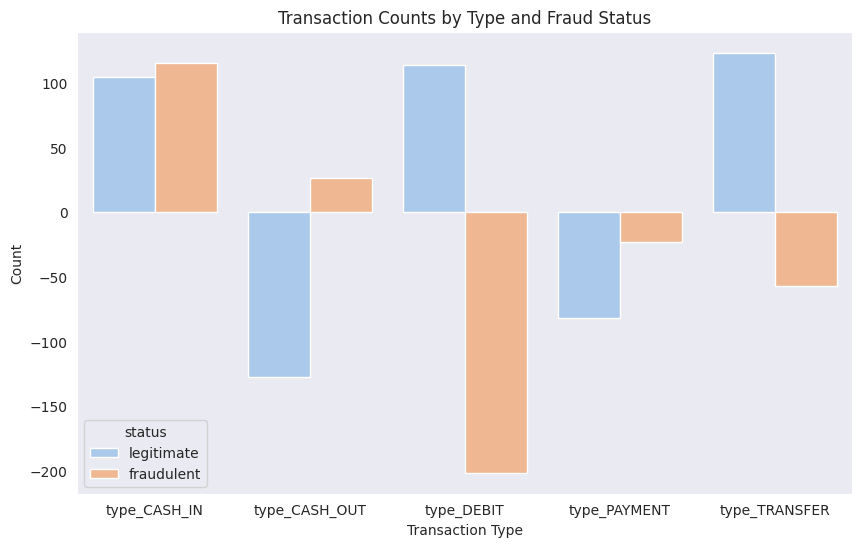

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train and y_train are already defined and X_train includes a column for 'target' indicating fraud (1) or not (0)
X_train = pd.DataFrame(X_train, columns=['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
X_train['target'] = y_train  # Add the target column for visualization

# Box Plot for 'amount' by target (Fraud vs. Legitimate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='amount', data=X_train)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.show()

# Histogram for 'amount' with hue as 'target' to show distribution for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amount', hue='target', bins=50, kde=True, element='step', stat='density')
plt.title('Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend(['Legitimate', 'Fraudulent'], title='Transaction Type')
plt.show()

recall_nn: 0.9560
# Pair plot to show relationships between features with hue based on fraud status
sns.pairplot(X_train, hue='target', plot_kws={'alpha': 0.5}, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features (Hue: Fraud Status)', y=1.02)
plt.show()

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()

# Count plot for transaction types with hue as fraud status
plt.figure(figsize=(10, 6))
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Sum up the one-hot encoded columns to count the transactions by type
transaction_counts = pd.DataFrame()
transaction_counts['type'] = transaction_types
transaction_counts['legitimate'] = [X_train[X_train['target'] == 0][t].sum() for t in transaction_types]
transaction_counts['fraudulent'] = [X_train[X_train['target'] == 1][t].sum() for t in transaction_types]

# Melt the DataFrame for easier plotting
transaction_counts_melted = transaction_counts.melt(id_vars=['type'], var_name='status', value_name='count')

sns.barplot(data=transaction_counts_melted, x='type', y='count', hue='status')
plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


<h2> Data analysis: blablabla

## **Gradient Boosting Model** (Supervised Learning)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred, zero_division=0)
recall_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"ROC-AUC Score: {roc_auc_gb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

import joblib

# ... your existing code ...

# Save the model using joblib
joblib.dump(gb_model, 'gb_model.pkl')

Accuracy: 0.9123
Precision: 0.9326
Recall: 0.8888
F1 Score: 0.9102
ROC-AUC Score: 0.9786

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     15982
           1       0.93      0.89      0.91     15981

    accuracy                           0.91     31963
   macro avg       0.91      0.91      0.91     31963
weighted avg       0.91      0.91      0.91     31963

Confusion Matrix:
 [[14955  1027]
 [ 1777 14204]]


['gb_model.pkl']

<h2> ROC Curve and AUC score

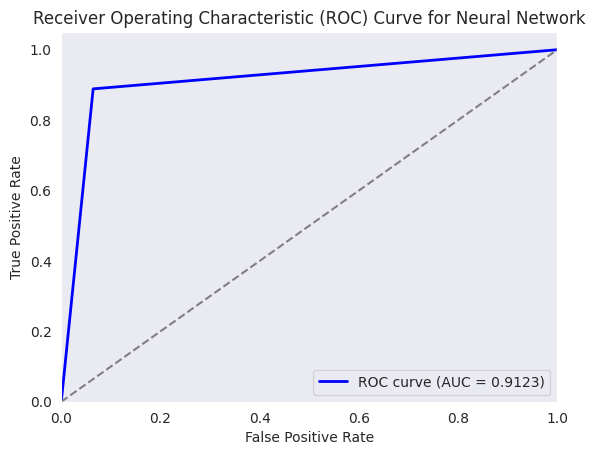

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability estimates for the positive class (fraud)
y_pred_proba_nn = gb_model.predict(X_test).flatten()

# Calculate the ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_nn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Neural Network')
plt.legend(loc='lower right')
plt.show()


<h2> Precision-Recall Curve

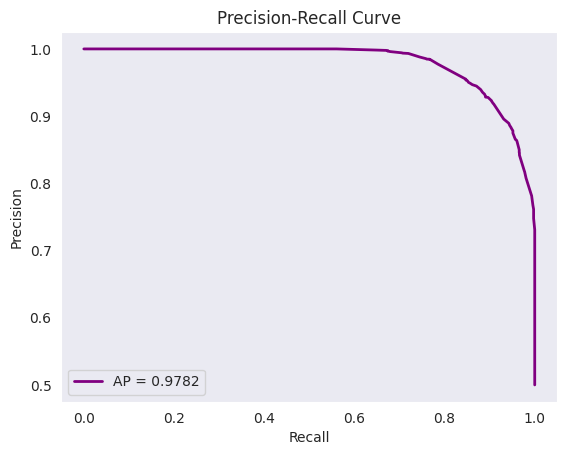

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score


# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='purple', lw=2, label=f'AP = {average_precision:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


<h2> Data Analysis and Visualization

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


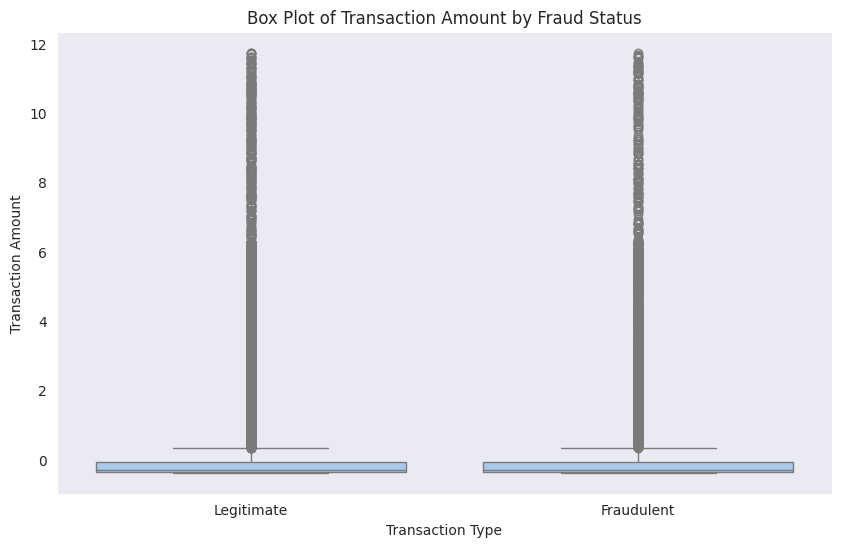

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

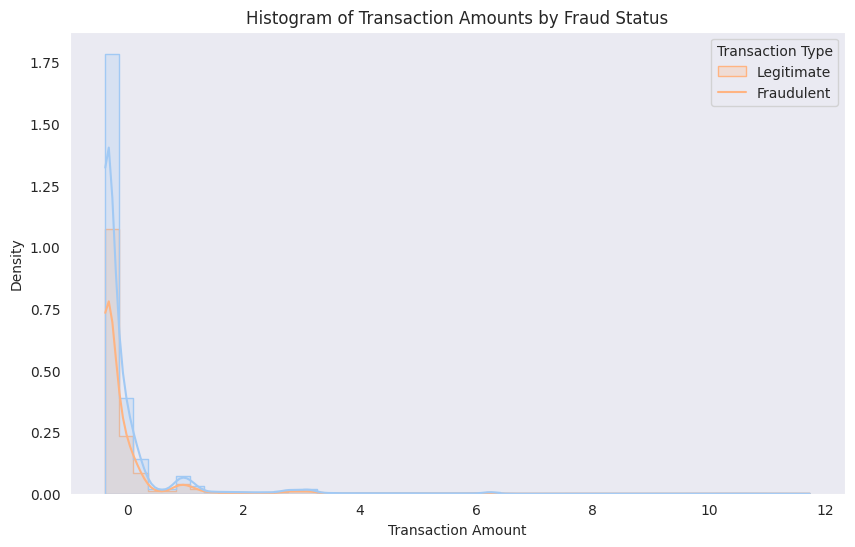

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

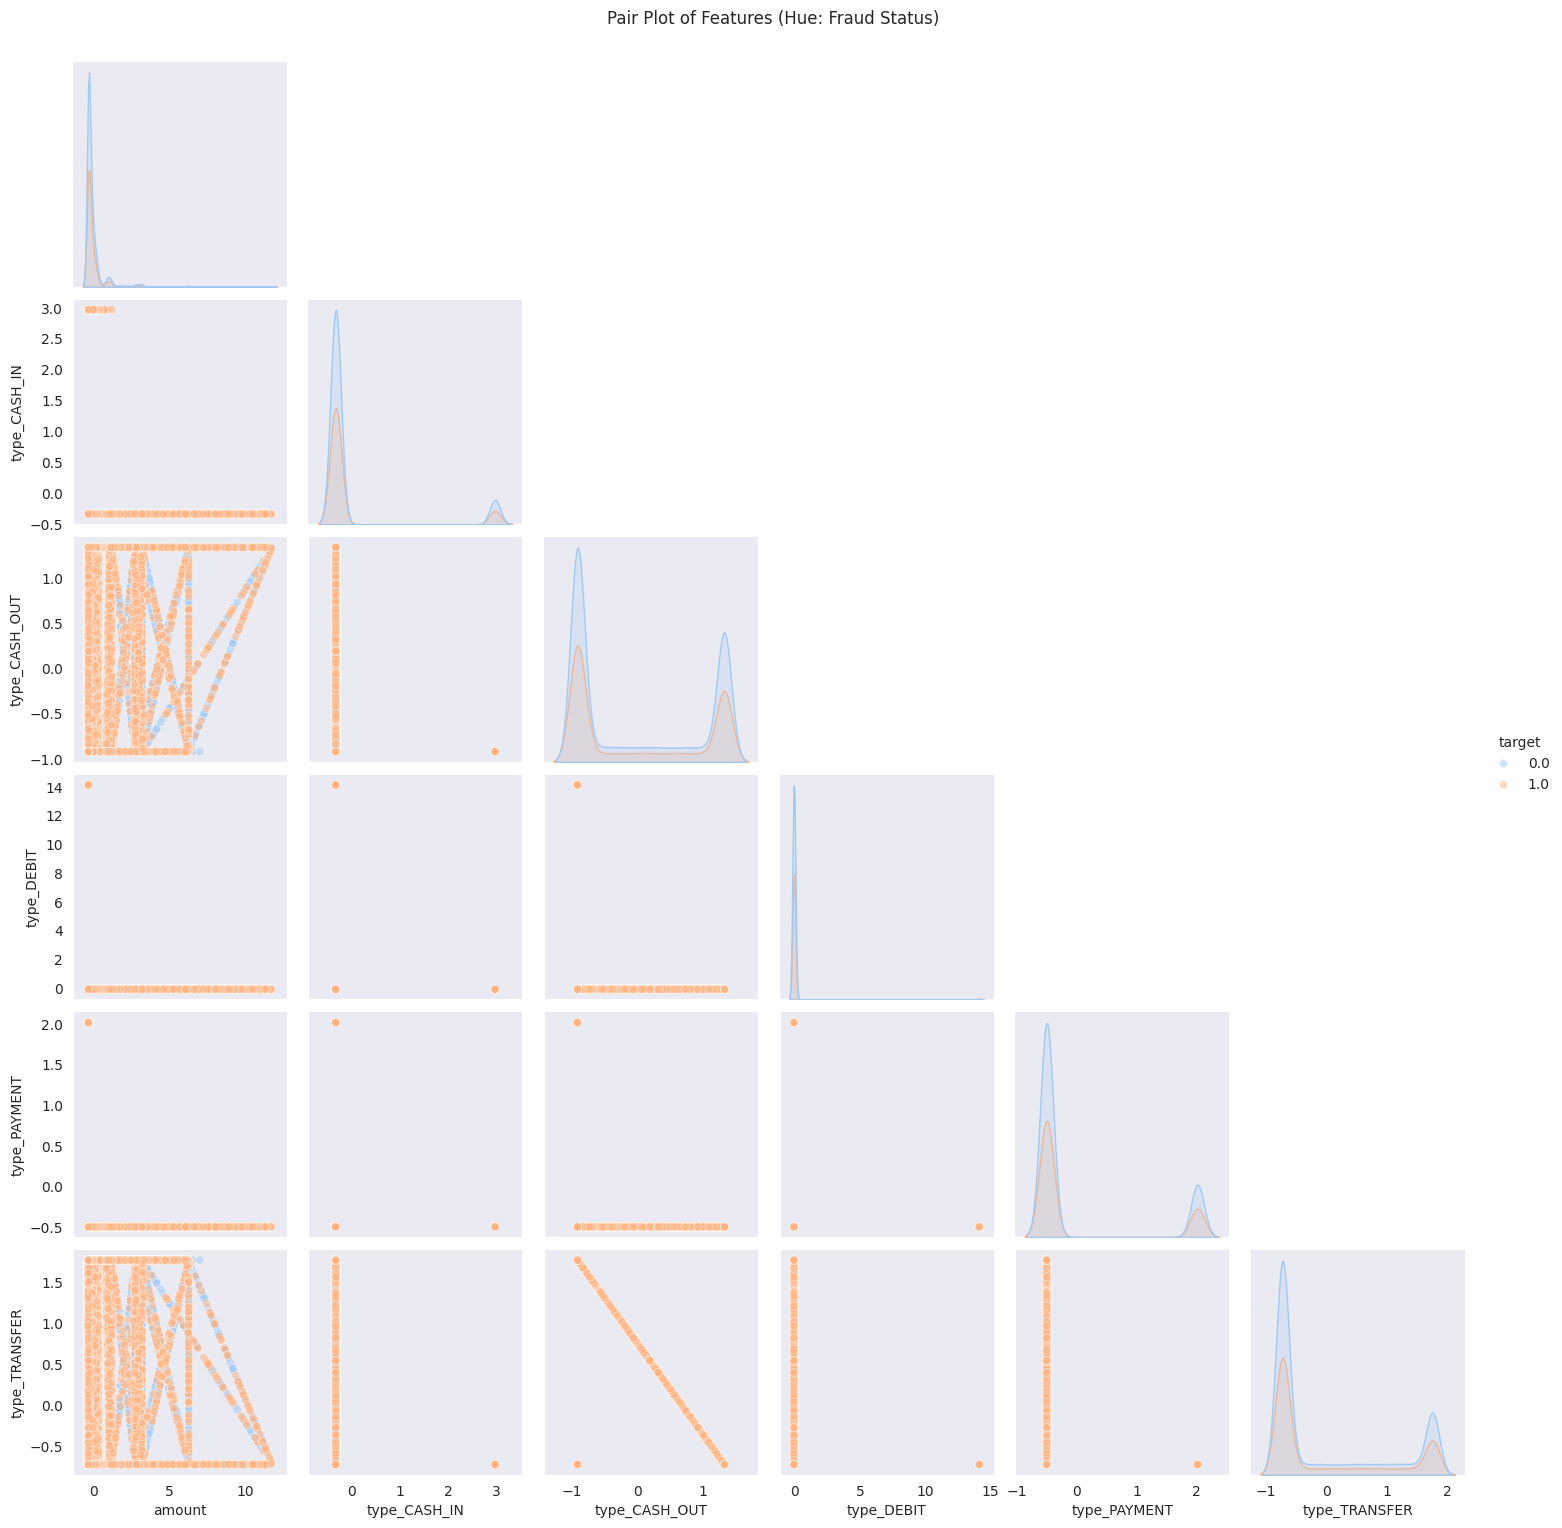

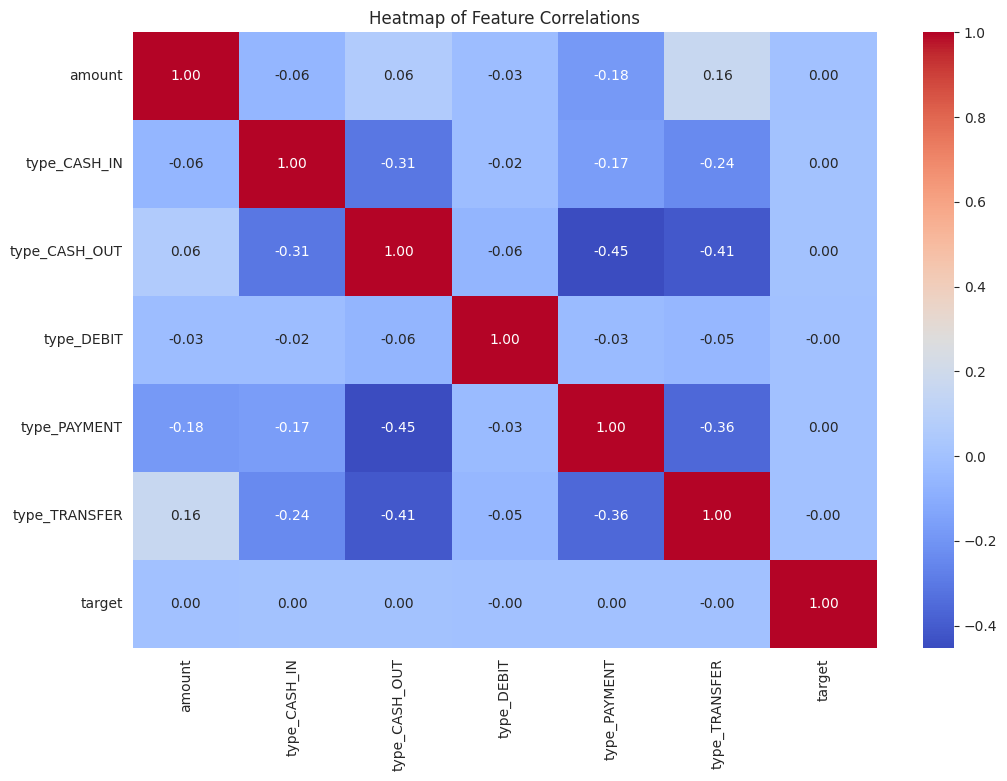

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


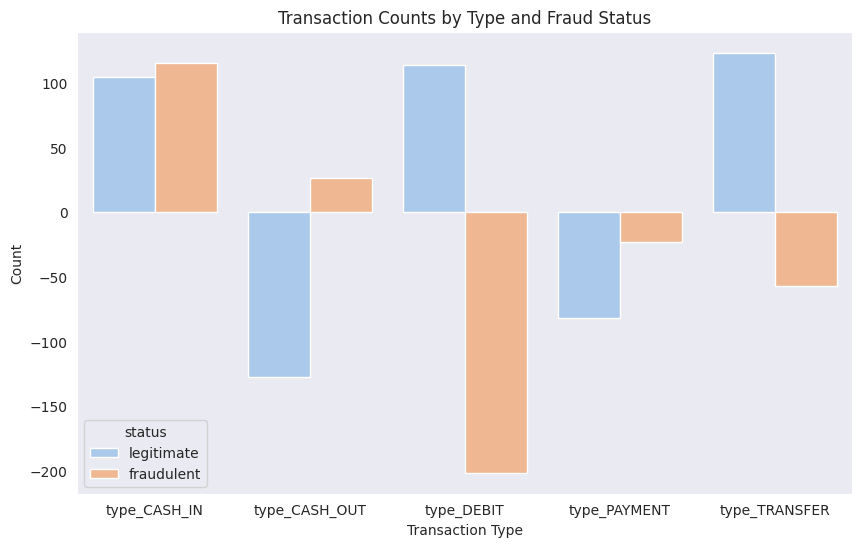

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_train and y_train are already defined and X_train includes a column for 'target' indicating fraud (1) or not (0)
X_train = pd.DataFrame(X_train, columns=['amount', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'])
X_train['target'] = y_train  # Add the target column for visualization

# Box Plot for 'amount' by target (Fraud vs. Legitimate)
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='amount', data=X_train)
plt.title('Box Plot of Transaction Amount by Fraud Status')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.show()

# Histogram for 'amount' with hue as 'target' to show distribution for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=X_train, x='amount', hue='target', bins=50, kde=True, element='step', stat='density')
plt.title('Histogram of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend(['Legitimate', 'Fraudulent'], title='Transaction Type')
plt.show()

# Pair plot to show relationships between features with hue based on fraud status
sns.pairplot(X_train, hue='target', plot_kws={'alpha': 0.5}, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features (Hue: Fraud Status)', y=1.02)
plt.show()

# Compute the correlation matrix
corr_matrix = X_train.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Feature Correlations')
plt.show()


# Count plot for transaction types with hue as fraud status
plt.figure(figsize=(10, 6))
transaction_types = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

# Sum up the one-hot encoded columns to count the transactions by type
transaction_counts = pd.DataFrame()
transaction_counts['type'] = transaction_types
transaction_counts['legitimate'] = [X_train[X_train['target'] == 0][t].sum() for t in transaction_types]
transaction_counts['fraudulent'] = [X_train[X_train['target'] == 1][t].sum() for t in transaction_types]

# Melt the DataFrame for easier plotting
transaction_counts_melted = transaction_counts.melt(id_vars=['type'], var_name='status', value_name='count')

sns.barplot(data=transaction_counts_melted, x='type', y='count', hue='status')
plt.title('Transaction Counts by Type and Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


## Comparing the Models

In [ ]:
recall_nn = 0.958
performance_df = pd.DataFrame({
    'models' : ['Multi Layer Perceptron', 'Decision Tree', 'Random Forest', 'Neural Network Model', 'Gradient Boosting Model'],
    'accuracy' : [accuracy_mlp, accuracy_dt, accuracy_rf, accuracy_nn, accuracy_gb],
    'precision' : [precision_mlp, precision_dt, precision_rf, precision_nn, precision_gb],
    'recall' : [recall_mlp, recall_dt, recall_rf, recall_nn, recall_gb],
    'f1 score' : [f1_mlp, f1_dt, f1_rf, f1_nn, f1_gb],
    'roc_auc' : [roc_auc_mlp, roc_auc_dt, roc_auc_rf, roc_auc_nn, roc_auc_gb]
})
performance_df

,models,accuracy,precision,recall,f1 score,roc_auc
0,Multi Layer Perceptron,0.887401,0.885396,0.889994,0.887689,0.963622
1,Decision Tree,0.498451,0.492828,0.107503,0.176504,0.498439
2,Random Forest,0.890936,0.890689,0.891246,0.890967,0.961269
3,Neural Network Model,0.888778,0.795800,0.958000,0.888715,0.912273
4,Gradient Boosting Model,0.912274,0.932572,0.888805,0.910163,0.978589


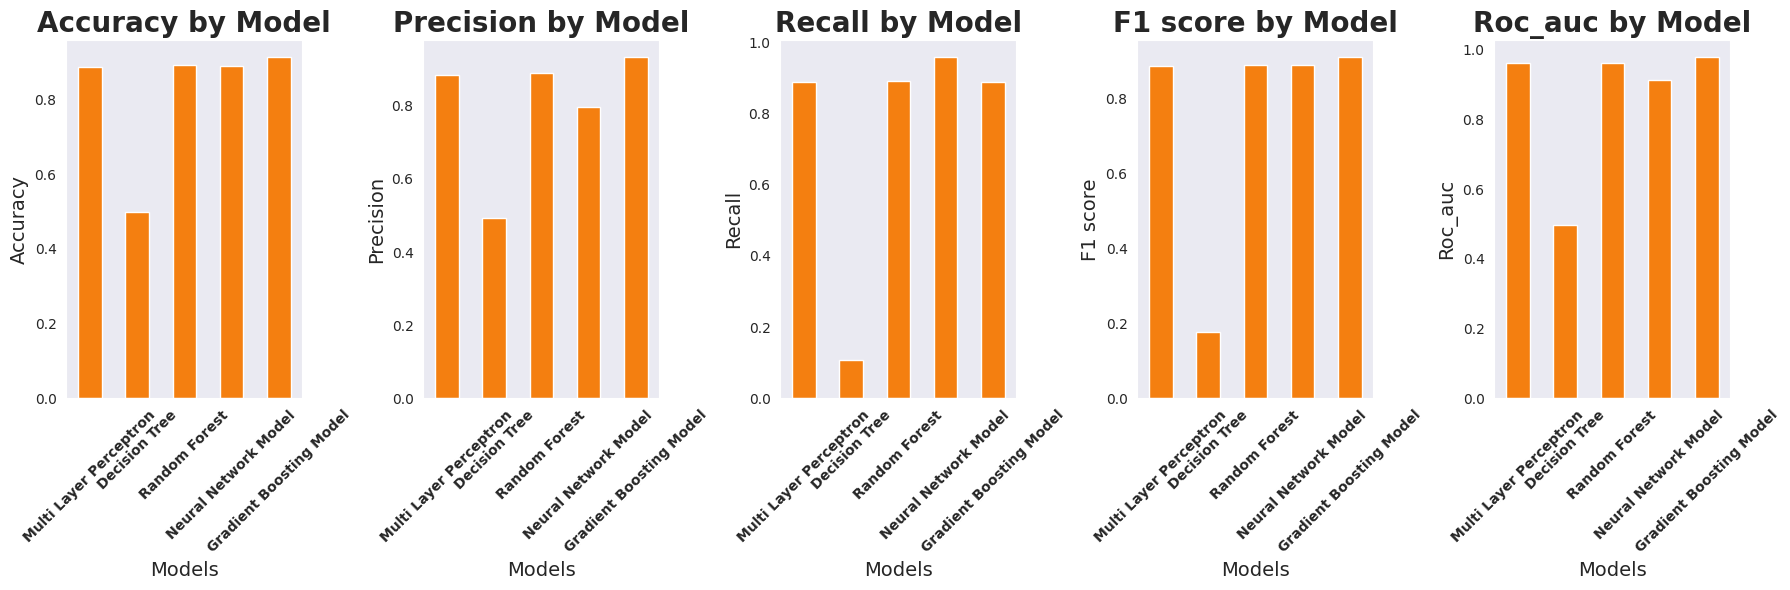

In [ ]:
# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 5, figsize=(18, 6))

metrics = ['accuracy', 'precision', 'recall', 'f1 score', 'roc_auc'] # Changed 'roc auc score' to 'roc_auc'

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')

    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')

    # Adding labels
    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')  # Set dynamic title

plt.tight_layout()
plt.show()

# Conclusion: